# 0.Data Preparation

In [2]:
from random import randrange, uniform
from sklearn.neighbors import NearestNeighbors
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, recall_score,f1_score,accuracy_score

## 0.1.Develop_set with Missing Value

### 0.1.1.Loading Data

In [1]:
from google.colab import files
uploaded = files.upload()

Saving develop_set_mv.csv to develop_set_mv.csv


In [3]:
df_0 = pd.read_csv("develop_set_mv.csv")#develop_set_mv.csv未处理缺失
#Compare the number of positive and negative samples
df_0['outcome'].value_counts()

0    3661
1     212
Name: outcome, dtype: int64

### 0.1.2.Drop EVENT

In [4]:
df_0 = df_0.drop(['EVENT'], axis=1)

### 0.1.3.Sample Split

In [5]:
# Split labels and features
X = df_0.drop(['outcome'], axis=1)
y = df_0['outcome']

# Split train_set and test_set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
#X_train.head(4)

### 0.1.4.Mean-mode Imputation

In [10]:
# Specify numerical and categorical variable column names
numerical_columns = ["TEVENT", "AGE", "SYSTBP", "DIASTBP", "SYSTH", "DIASTH",
                  "LENGTHO", "WEIGHTO", "BMIO", "CHOLO", "packyrs"]
categorical_columns = [ "SEX", "DIABETES", "CEREBRAL", "CARDIAC", "AAA",
                      "PERIPH", "STENOSIS", "albumin", "SMOKING", "alcohol"]

In [8]:
X_train_mean = X_train

In [9]:
#Training_Set
# Mean Imputation on Numerical Variables
X_train_mean[numerical_columns] = X_train_mean[numerical_columns].fillna(X_train_mean[numerical_columns].mean())
# Mode Imputation on Categorical Variables
X_train_mean[categorical_columns] = X_train_mean[categorical_columns].fillna(X_train_mean[categorical_columns].mode().iloc[0])
#print(X_train)

In [10]:
X_test_mean = X_test

In [11]:
#Test_Set
# Mean Imputation on Numerical Variables
X_test_mean[numerical_columns] = X_test_mean[numerical_columns].fillna(X_test_mean[numerical_columns].mean())
# Mode Imputation on Categorical Variables
X_test_mean[categorical_columns] = X_test_mean[categorical_columns].fillna(X_test_mean[categorical_columns].mode().iloc[0])
#print(X_test)

### 0.1.5.OneHotEncoder on Mean Imputation

In [6]:
! pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 1.8 MB/s eta 0:00:00


In [13]:
import category_encoders as ce

In [14]:
encoder_0 = ce.OneHotEncoder(cols=['SMOKING', 'SEX', 'albumin', 'alcohol']).fit(X_train)
X_train_mean = encoder_0.transform(X_train_mean)

In [15]:
encoder_1 = ce.OneHotEncoder(cols=['SMOKING', 'SEX', 'albumin', 'alcohol']).fit(X_test)
X_test_mean = encoder_1.transform(X_test_mean)

In [16]:
print(X_train_mean)

      TEVENT  SEX_1  SEX_2  AGE  DIABETES  CEREBRAL  CARDIAC  AAA  PERIPH  \
2194  1226.0      1      0   48       0.0         0        1    0       0   
1797  1622.0      1      0   61       0.0         0        1    0       0   
931   2452.0      1      0   49       0.0         0        1    0       0   
1441   374.0      1      0   77       0.0         0        0    1       0   
2883   702.0      1      0   64       0.0         1        0    0       1   
...      ...    ...    ...  ...       ...       ...      ...  ...     ...   
1130  2289.0      1      0   45       0.0         1        0    0       1   
1294  2154.0      1      0   41       0.0         0        1    0       0   
860    858.0      0      1   63       1.0         1        0    0       0   
3507   217.0      1      0   62       1.0         1        0    0       0   
3174   497.0      1      0   46       0.0         0        1    0       0   

      STENOSIS  ...  albumin_1  albumin_2  albumin_3  SMOKING_1  SMOKING_2 

### 0.1.6.Balancing on Mean Imputation

In [14]:
from imblearn.over_sampling import SMOTE

### 0.1.6.1.Balancing on Mean Imputation（Expand5x）

In [18]:
# 创建 SMOTE 实例
smote = SMOTE(sampling_strategy = 0.3,random_state=0)

In [19]:
# 对Training_Set应用 SMOTE
X_train_mean_res, y_train_res = smote.fit_resample(X_train_mean, y_train)

In [20]:
# 统计平衡后的正、负类样本数量
unique, counts = np.unique(y_train_res, return_counts=True)
class_counts = dict(zip(unique, counts))

print("Class Counts After SMOTE:", class_counts)

Class Counts After SMOTE: {0: 1831, 1: 549}


### 0.1.6.2.Balancing on Mean Imputation (To Balance）

In [21]:
sm = SMOTE(random_state=0)

In [22]:
X_train_mean_bal, y_train_bal = sm.fit_resample(X_train_mean, y_train)

### 0.1.7.Multi Imputation & OneHotEncoder on Multi Imputation

In [7]:
! pip install fancyimpute

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 4.4 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29880 sha256=d96b326bdb43e50a8a860997cec22236e7923fdfcede6d1b7b373629fae8c5ae
  Stored in directory: /root/.cache/pip/wheels/7b/0c/d3/ee82d1fbdcc0858d96434af108608d01703505d453720c84ed
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11329 sha256=8a3355b9af8ffc158c2fa9a136a9a45949cbf80353de2d327bf640422edc4954
  Stored in directory: /root/.cache/pip/wheels/46/06/a5/45a724630562413c374e29c08732411d496092408b3a7bf754
Successfully built fancyimpute knnimpute


In [8]:
import pandas as pd
from fancyimpute import IterativeImputer

In [11]:
# 进行5次Multi Imputation
n_imputations = 5
imputed_datasets_0 = []

for _ in range(n_imputations):
    imputer = IterativeImputer(max_iter=500, random_state=None)
    imputed_df_0 = X_train.copy()
    # Imputation on Categorical Variables
    imputed_df_0[categorical_columns] = imputed_df_0[categorical_columns].fillna(imputed_df_0[categorical_columns].mode().iloc[0])

    imputed_df_0[numerical_columns] = imputer.fit_transform(imputed_df_0[numerical_columns])
    imputed_datasets_0.append(imputed_df_0)

# 打印Multi Imputation后的数据集
#for i, imputed_df in enumerate(imputed_datasets_0):
#    print(f"Imputed Dataset {i + 1}:\n{imputed_df_0}\n")

# 对插补后的数据集进行OneHotEncoder
X_train_multi = []

for imputed_df_0 in imputed_datasets_0:
    X_train_imputed = pd.get_dummies(imputed_df_0, columns=categorical_columns)
    X_train_multi.append(X_train_imputed)


In [12]:
# 进行5次Multi Imputation
n_imputations = 5
imputed_datasets_1 = []

for _ in range(n_imputations):
    imputer = IterativeImputer(max_iter=500, random_state=None)
    imputed_df_1 = X_test.copy()
    # Imputation on Categorical Variables
    imputed_df_1[categorical_columns] = imputed_df_1[categorical_columns].fillna(imputed_df_1[categorical_columns].mode().iloc[0])
    imputed_df_1[numerical_columns] = imputer.fit_transform(imputed_df_1[numerical_columns])
    imputed_datasets_1.append(imputed_df_1)

# 打印Multi Imputation后的数据集
#for i, imputed_df in enumerate(imputed_datasets_0):
#    print(f"Imputed Dataset {i + 1}:\n{imputed_df_0}\n")

# 对插补后的数据集进行OneHotEncoder
X_test_multi = []

for imputed_df_1 in imputed_datasets_1:
    X_test_imputed = pd.get_dummies(imputed_df_1, columns=categorical_columns)
    X_test_multi.append(X_test_imputed)

In [26]:
# 打印Multi Imputation后的数据集
for i, X_train_imputed in enumerate(X_train_multi):
    print(f"Imputed Dataset {i + 1}:\n{X_train_imputed}\n")

Imputed Dataset 1:
      TEVENT   AGE      SYSTBP     DIASTBP       SYSTH     DIASTH  LENGTHO  \
2194  1226.0  48.0  124.000000   76.000000  116.000000  77.000000     1.76   
1797  1622.0  61.0  152.000000   85.000000  141.967581  82.085691     1.76   
931   2452.0  49.0  115.000000   66.000000  123.000000  76.000000     1.76   
1441   374.0  77.0  167.000000   85.000000  145.000000  88.000000     1.74   
2883   702.0  64.0  140.711465   79.481425  136.000000  81.000000     1.81   
...      ...   ...         ...         ...         ...        ...      ...   
1130  2289.0  45.0  140.711465   79.481425  123.000000  74.000000     1.72   
1294  2154.0  41.0  105.000000   69.000000  116.000000  81.000000     1.65   
860    858.0  63.0  186.000000  104.000000  170.000000  96.000000     1.64   
3507   217.0  62.0  140.711465   79.481425  140.000000  91.000000     1.69   
3174   497.0  46.0  140.711465   79.481425  116.000000  74.000000     1.76   

      WEIGHTO   BMIO  CHOLO  ...  STENOSIS_1

### 0.1.8.Balancing on Multi Imputation

### 0.1.8.1.Balancing on Multi Imputation（Expand5x）

In [15]:
# Using SMOTE to Oversampling on Multi Imputed Data
X_train_multi_res = []
y_train_multi_res = []

for X_train_imputed in X_train_multi:
    smote = SMOTE(sampling_strategy = 0.3,random_state=0)
    X_train_imputed_res, y_train_imputed_res = smote.fit_resample(X_train_imputed, y_train)
    X_train_multi_res.append(X_train_imputed_res)
    y_train_multi_res.append(y_train_imputed_res)


### 0.1.8.2.Balancing on Multi Imputation(To Balance）

In [16]:
# Using SMOTE to Oversampling on Multi Imputed Data
X_train_multi_bal = []
y_train_multi_bal = []

for X_train_imputed in X_train_multi:
    sm = SMOTE(random_state=0)
    X_train_imputed_bal, y_train_imputed_bal = sm.fit_resample(X_train_imputed, y_train)
    X_train_multi_bal.append(X_train_imputed_bal)
    y_train_multi_bal.append(y_train_imputed_bal)

## 0.2.Develop_set with Missing Deleted

### 0.2.1.Loading Data

In [96]:
from google.colab import files
uploaded = files.upload()

Saving develop_set_cc.csv to develop_set_cc.csv


In [97]:
##同样的方法处理比较集##
df_1 = pd.read_csv('develop_set_cc.csv')#develop_set_cc.csv删除了缺失
#Compare the number of positive and negative samples
#compare_data['outcome'].value_counts()

In [98]:
df_1['outcome'].value_counts()

0    972
1     58
Name: outcome, dtype: int64

### 0.2.2.Drop EVENT

In [99]:
df_1 = df_1.drop(['EVENT'], axis=1)

### 0.2.3.OneHotEncoder

In [100]:
import category_encoders as ce
encoder_2 = ce.OneHotEncoder(cols=['SMOKING', 'SEX', 'albumin', 'alcohol']).fit(df_1)
numeric_dataset_2 = encoder_2.transform(df_1)

### 0.2.4.Sample Split

In [101]:
# Split labels and features
X = numeric_dataset_2.drop(['outcome'], axis=1)
y = numeric_dataset_2['outcome']

# Split train_set and test_set
X_train_cc, X_test_cc, y_train_cc, y_test_cc = train_test_split(X, y, test_size=0.5, random_state=42)

#X_train.head(4)

### 0.2.5.Balancing on Complete Case

In [102]:
# 对Training_Set应用 SMOTE
X_train_cc_res, y_train_cc_res = smote.fit_resample(X_train_cc, y_train_cc)

In [103]:
X_train_cc_bal, y_train_cc_bal = sm.fit_resample(X_train_cc, y_train_cc)

In [104]:
# 统计平衡后的正、负类样本数量
unique, counts = np.unique(y_train_cc_bal, return_counts=True)
class_counts = dict(zip(unique, counts))

print("Class Counts After SMOTE:", class_counts)

Class Counts After SMOTE: {0: 480, 1: 480}


In [38]:
print(X_train_cc)

     TEVENT  SEX_1  SEX_2  AGE  DIABETES  CEREBRAL  CARDIAC  AAA  PERIPH  \
417    1945      0      1   68         0         1        0    0       0   
89      654      1      0   69         0         0        1    0       1   
958     940      1      0   35         0         1        0    0       0   
901    1051      1      0   57         0         0        0    1       0   
633    1304      1      0   67         0         0        1    0       0   
..      ...    ...    ...  ...       ...       ...      ...  ...     ...   
87     2421      0      1   59         0         1        0    0       0   
330      73      1      0   67         0         0        1    0       1   
466     452      1      0   54         1         0        1    0       0   
121    2367      1      0   49         0         0        0    0       1   
860    1021      1      0   71         0         0        1    0       0   

     STENOSIS  ...  albumin_1  albumin_2  albumin_3  SMOKING_1  SMOKING_2  \
417       

# 1.Using Unbalanced Data to Train Models

## 1.1.Logistic Regression (Unbalanced)

### 1.1.1.Mean Imputation

In [49]:
# Create a logistic regression model
clf1 = LogisticRegression()
# Model Training
clf1.fit(X_train_mean, y_train)
# Prediction
y_pred1 = clf1.predict(X_test_mean)

# Performance Evaluation
matrix = confusion_matrix(y_test, y_pred1)
print(matrix)
recall = recall_score(y_test, y_pred1)
print('recall:',recall)
acc = accuracy_score(y_test, y_pred1)
print('accuracy:',acc)
f1 = f1_score(y_test, y_pred1)
print("f1_score:",f1)

[[1810   20]
 [  96   11]]
recall: 0.102803738317757
accuracy: 0.9401135776974703
f1_score: 0.15942028985507245


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 1.1.2.Multi Imputation

In [19]:
# Initialize the list storing various metrics
accuracies = []
auc_scores = []
sensitivities = []
specificities = []
f1scores = []

# Model training and evaluation
for i, (X_train_imputed, X_test_imputed) in enumerate(zip(X_train_multi, X_test_multi)):
    clf4 = LogisticRegression()
    clf4.fit(X_train_imputed, y_train)

    y_pred = clf4.predict(X_test_imputed)
    y_pred_prob = clf4.predict_proba(X_test_imputed)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_prob)

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    f1 = f1_score(y_test, y_pred)

    accuracies.append(accuracy)
    auc_scores.append(auc)
    sensitivities.append(sensitivity)
    specificities.append(specificity)
    f1scores.append(f1)

    print(f"Imputation {i+1}:")
    print(f"Accuracy: {accuracy}")
    print(f"AUC: {auc}")
    print(f"Sensitivity: {sensitivity}")
    print(f"Specificity: {specificity}")
    print("f1_score:",f1)
    print("\n")

# Calculate average indicators
avg_accuracy = np.mean(accuracies)
avg_auc = np.mean(auc_scores)
avg_sensitivity = np.mean(sensitivities)
avg_specificity = np.mean(specificities)
avg_f1score = np.mean(f1scores)

print("Average Metrics:")
print(f"Avg Accuracy: {avg_accuracy}")
print(f"Avg AUC: {avg_auc}")
print(f"Avg Sensitivity: {avg_sensitivity}")
print(f"Avg Specificity: {avg_specificity}")
print(f"Avg F1-score: {avg_f1score}")

# Obtain the average indicator value for five imputations.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Imputation 1:
Accuracy: 0.9442436757873
AUC: 0.925657525151933
Sensitivity: 0.16822429906542055
Specificity: 0.9896174863387979
f1_score: 0.25


Imputation 2:
Accuracy: 0.9442436757873
AUC: 0.925657525151933
Sensitivity: 0.16822429906542055
Specificity: 0.9896174863387979
f1_score: 0.25


Imputation 3:
Accuracy: 0.9442436757873
AUC: 0.925657525151933
Sensitivity: 0.16822429906542055
Specificity: 0.9896174863387979
f1_score: 0.25


Imputation 4:
Accuracy: 0.9442436757873
AUC: 0.925657525151933
Sensitivity: 0.16822429906542055
Specificity: 0.9896174863387979
f1_score: 0.25


Imputation 5:
Accuracy: 0.9442436757873
AUC: 0.925657525151933
Sensitivity: 0.16822429906542055
Specificity: 0.9896174863387979
f1_score: 0.25


Average Metrics:
Avg Accuracy: 0.9442436757872998
Avg AUC: 0.925657525151933
Avg Sensitivity: 0.16822429906542055
Avg Specificity: 0.9896174863387979
Avg F1-score: 0.25


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

### 1.1.3.Complete Case

In [105]:
# Create a logistic regression model
clf7 = LogisticRegression()
# Model Training
clf7.fit(X_train_cc, y_train_cc)
# Prediction
y_pred7 = clf7.predict(X_test_cc)

# Performance Evaluation
matrix = confusion_matrix(y_test_cc, y_pred7)
print(matrix)
recall = recall_score(y_test_cc, y_pred7)
print('recall:',recall)
acc = accuracy_score(y_test_cc, y_pred7)
print('accuracy:',acc)
f1 = f1_score(y_test_cc, y_pred7)
print("f1_score:",f1)

[[482  10]
 [  4  19]]
recall: 0.8260869565217391
accuracy: 0.9728155339805825
f1_score: 0.7307692307692308


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 1.2.KNN (Unbalanced)

In [21]:
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier

### 1.2.1.Mean Imputation

In [26]:
# Create KNN classifier
knn1 = KNeighborsClassifier(n_neighbors=3)
# Perform KNN analysis on processed data
knn1.fit(X_train_mean, y_train)
y_pred10 = knn1.predict(X_test_mean)

In [27]:
matrix = confusion_matrix(y_test, y_pred10)
print(matrix)
recall = recall_score(y_test, y_pred10)
print('recall:',recall)
acc = accuracy_score(y_test, y_pred10)
print('accuracy:',acc)
f1 = f1_score(y_test, y_pred10)
print("f1_score:",f1)

[[1805   25]
 [  88   19]]
recall: 0.17757009345794392
accuracy: 0.9416623644811565
f1_score: 0.25165562913907286


In [28]:
# Create KNN classifier
knn2 = KNeighborsClassifier(n_neighbors=5)
# Perform KNN analysis on processed data
knn2.fit(X_train_mean, y_train)
y_pred11 = knn2.predict(X_test_mean)

In [29]:
matrix = confusion_matrix(y_test, y_pred11)
print(matrix)
recall = recall_score(y_test, y_pred11)
print('recall:',recall)
acc = accuracy_score(y_test, y_pred11)
print('accuracy:',acc)
f1 = f1_score(y_test, y_pred11)
print("f1_score:",f1)

[[1813   17]
 [  91   16]]
recall: 0.14953271028037382
accuracy: 0.9442436757873
f1_score: 0.22857142857142854


In [30]:
# Create KNN classifier
knn3 = KNeighborsClassifier(n_neighbors=9)
# Perform KNN analysis on processed data
knn3.fit(X_train_mean, y_train)
y_pred12 = knn3.predict(X_test_mean)

In [31]:
matrix = confusion_matrix(y_test, y_pred12)
print(matrix)
recall = recall_score(y_test, y_pred12)
print('recall:',recall)
acc = accuracy_score(y_test, y_pred12)
print('accuracy:',acc)
f1 = f1_score(y_test, y_pred12)
print("f1_score:",f1)

[[1824    6]
 [ 100    7]]
recall: 0.06542056074766354
accuracy: 0.9452762003097573
f1_score: 0.11666666666666665


### 1.2.2.Multi Imputation

In [22]:
# Initialize the list storing various metrics
accuracies = []
auc_scores = []
sensitivities = []
specificities = []
f1scores = []

# Model training and evaluation
for i, (X_train_imputed, X_test_imputed) in enumerate(zip(X_train_multi, X_test_multi)):
    knn10 = KNeighborsClassifier(n_neighbors=3)
    knn10.fit(X_train_imputed, y_train)

    y_pred = knn10.predict(X_test_imputed)
    y_pred_prob = knn10.predict_proba(X_test_imputed)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_prob)

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    f1 = f1_score(y_test, y_pred)

    accuracies.append(accuracy)
    auc_scores.append(auc)
    sensitivities.append(sensitivity)
    specificities.append(specificity)
    f1scores.append(f1)

    print(f"Imputation {i+1}:")
    print(f"Accuracy: {accuracy}")
    print(f"AUC: {auc}")
    print(f"Sensitivity: {sensitivity}")
    print(f"Specificity: {specificity}")
    print("f1_score:",f1)
    print("\n")

# Calculate average indicators
avg_accuracy = np.mean(accuracies)
avg_auc = np.mean(auc_scores)
avg_sensitivity = np.mean(sensitivities)
avg_specificity = np.mean(specificities)
avg_f1score = np.mean(f1scores)

print("Average Metrics:")
print(f"Avg Accuracy: {avg_accuracy}")
print(f"Avg AUC: {avg_auc}")
print(f"Avg Sensitivity: {avg_sensitivity}")
print(f"Avg Specificity: {avg_specificity}")
print(f"Avg F1-score: {avg_f1score}")

# Obtain the average indicator value for five imputations.


Imputation 1:
Accuracy: 0.9334021683014971
AUC: 0.6583167356110515
Sensitivity: 0.09345794392523364
Specificity: 0.9825136612021858
f1_score: 0.1342281879194631


Imputation 2:
Accuracy: 0.9334021683014971
AUC: 0.6583167356110515
Sensitivity: 0.09345794392523364
Specificity: 0.9825136612021858
f1_score: 0.1342281879194631


Imputation 3:
Accuracy: 0.9334021683014971
AUC: 0.6583167356110515
Sensitivity: 0.09345794392523364
Specificity: 0.9825136612021858
f1_score: 0.1342281879194631


Imputation 4:
Accuracy: 0.9334021683014971
AUC: 0.6583167356110515
Sensitivity: 0.09345794392523364
Specificity: 0.9825136612021858
f1_score: 0.1342281879194631


Imputation 5:
Accuracy: 0.9334021683014971
AUC: 0.6583167356110515
Sensitivity: 0.09345794392523364
Specificity: 0.9825136612021858
f1_score: 0.1342281879194631


Average Metrics:
Avg Accuracy: 0.933402168301497
Avg AUC: 0.6583167356110515
Avg Sensitivity: 0.09345794392523364
Avg Specificity: 0.9825136612021858
Avg F1-score: 0.1342281879194631


In [ ]:
# Initialize the list storing various metrics
accuracies = []
auc_scores = []
sensitivities = []
specificities = []
f1scores = []

# Model training and evaluation
for i, (X_train_imputed, X_test_imputed) in enumerate(zip(X_train_multi, X_test_multi)):
    knn11 = KNeighborsClassifier(n_neighbors=5)
    knn11.fit(X_train_imputed, y_train)

    y_pred = knn11.predict(X_test_imputed)
    y_pred_prob = knn11.predict_proba(X_test_imputed)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_prob)

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    f1 = f1_score(y_test, y_pred)

    accuracies.append(accuracy)
    auc_scores.append(auc)
    sensitivities.append(sensitivity)
    specificities.append(specificity)
    f1scores.append(f1)

    print(f"Imputation {i+1}:")
    print(f"Accuracy: {accuracy}")
    print(f"AUC: {auc}")
    print(f"Sensitivity: {sensitivity}")
    print(f"Specificity: {specificity}")
    print("f1_score:",f1)
    print("\n")

# Calculate average indicators
avg_accuracy = np.mean(accuracies)
avg_auc = np.mean(auc_scores)
avg_sensitivity = np.mean(sensitivities)
avg_specificity = np.mean(specificities)
avg_f1score = np.mean(f1scores)

print("Average Metrics:")
print(f"Avg Accuracy: {avg_accuracy}")
print(f"Avg AUC: {avg_auc}")
print(f"Avg Sensitivity: {avg_sensitivity}")
print(f"Avg Specificity: {avg_specificity}")
print(f"Avg F1-score: {avg_f1score}")

# Obtain the average indicator value for five imputations.


Imputation 1:
Accuracy: 0.9442436757873
AUC: 0.7711506051784894
Sensitivity: 0.14953271028037382
Specificity: 0.9907103825136612
f1_score: 0.22857142857142854


Imputation 2:
Accuracy: 0.9442436757873
AUC: 0.7711506051784894
Sensitivity: 0.14953271028037382
Specificity: 0.9907103825136612
f1_score: 0.22857142857142854


Imputation 3:
Accuracy: 0.9442436757873
AUC: 0.7711506051784894
Sensitivity: 0.14953271028037382
Specificity: 0.9907103825136612
f1_score: 0.22857142857142854


Imputation 4:
Accuracy: 0.9442436757873
AUC: 0.7711506051784894
Sensitivity: 0.14953271028037382
Specificity: 0.9907103825136612
f1_score: 0.22857142857142854


Imputation 5:
Accuracy: 0.9442436757873
AUC: 0.7711506051784894
Sensitivity: 0.14953271028037382
Specificity: 0.9907103825136612
f1_score: 0.22857142857142854


Average Metrics:
Avg Accuracy: 0.9442436757872998
Avg AUC: 0.7711506051784894
Avg Sensitivity: 0.14953271028037382
Avg Specificity: 0.9907103825136613
Avg F1-score: 0.22857142857142856


In [ ]:
# Initialize the list storing various metrics
accuracies = []
auc_scores = []
sensitivities = []
specificities = []
f1scores = []

# Model training and evaluation
for i, (X_train_imputed, X_test_imputed) in enumerate(zip(X_train_multi, X_test_multi)):
    knn12 = KNeighborsClassifier(n_neighbors=9)
    knn12.fit(X_train_imputed, y_train)

    y_pred = knn12.predict(X_test_imputed)
    y_pred_prob = knn12.predict_proba(X_test_imputed)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_prob)

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    f1 = f1_score(y_test, y_pred)

    accuracies.append(accuracy)
    auc_scores.append(auc)
    sensitivities.append(sensitivity)
    specificities.append(specificity)
    f1scores.append(f1)

    print(f"Imputation {i+1}:")
    print(f"Accuracy: {accuracy}")
    print(f"AUC: {auc}")
    print(f"Sensitivity: {sensitivity}")
    print(f"Specificity: {specificity}")
    print("f1_score:",f1)
    print("\n")

# Calculate average indicators
avg_accuracy = np.mean(accuracies)
avg_auc = np.mean(auc_scores)
avg_sensitivity = np.mean(sensitivities)
avg_specificity = np.mean(specificities)
avg_f1score = np.mean(f1scores)

print("Average Metrics:")
print(f"Avg Accuracy: {avg_accuracy}")
print(f"Avg AUC: {avg_auc}")
print(f"Avg Sensitivity: {avg_sensitivity}")
print(f"Avg Specificity: {avg_specificity}")
print(f"Avg F1-score: {avg_f1score}")

# Obtain the average indicator value for five imputations.


Imputation 1:
Accuracy: 0.9452762003097573
AUC: 0.8269955569174198
Sensitivity: 0.06542056074766354
Specificity: 0.9967213114754099
f1_score: 0.11666666666666665


Imputation 2:
Accuracy: 0.9452762003097573
AUC: 0.8269955569174198
Sensitivity: 0.06542056074766354
Specificity: 0.9967213114754099
f1_score: 0.11666666666666665


Imputation 3:
Accuracy: 0.9452762003097573
AUC: 0.8269955569174198
Sensitivity: 0.06542056074766354
Specificity: 0.9967213114754099
f1_score: 0.11666666666666665


Imputation 4:
Accuracy: 0.9452762003097573
AUC: 0.8269955569174198
Sensitivity: 0.06542056074766354
Specificity: 0.9967213114754099
f1_score: 0.11666666666666665


Imputation 5:
Accuracy: 0.9452762003097573
AUC: 0.8269955569174198
Sensitivity: 0.06542056074766354
Specificity: 0.9967213114754099
f1_score: 0.11666666666666665


Average Metrics:
Avg Accuracy: 0.9452762003097573
Avg AUC: 0.8269955569174197
Avg Sensitivity: 0.06542056074766354
Avg Specificity: 0.9967213114754099
Avg F1-score: 0.1166666666666

### 1.2.3.Complete Case

In [106]:
# Create KNN classifier
knn19 = KNeighborsClassifier(n_neighbors=3)
# Perform KNN analysis on processed data
knn19.fit(X_train_cc, y_train_cc)
y_pred28 = knn19.predict(X_test_cc)

In [107]:
matrix = confusion_matrix(y_test_cc, y_pred28)
print(matrix)
recall = recall_score(y_test_cc, y_pred28)
print('recall:',recall)
acc = accuracy_score(y_test_cc, y_pred28)
print('accuracy:',acc)
f1 = f1_score(y_test_cc, y_pred28)
print("f1_score:",f1)

[[483   9]
 [  4  19]]
recall: 0.8260869565217391
accuracy: 0.974757281553398
f1_score: 0.7450980392156864


In [108]:
# Create KNN classifier
knn20 = KNeighborsClassifier(n_neighbors=5)
# Perform KNN analysis on processed data
knn20.fit(X_train_cc, y_train_cc)
y_pred29 = knn20.predict(X_test_cc)

In [109]:
matrix = confusion_matrix(y_test_cc, y_pred29)
print(matrix)
recall = recall_score(y_test_cc, y_pred29)
print('recall:',recall)
acc = accuracy_score(y_test_cc, y_pred29)
print('accuracy:',acc)
f1 = f1_score(y_test_cc, y_pred29)
print("f1_score:",f1)

[[483   9]
 [  4  19]]
recall: 0.8260869565217391
accuracy: 0.974757281553398
f1_score: 0.7450980392156864


In [110]:
# Create KNN classifier
knn21 = KNeighborsClassifier(n_neighbors=9)
# Perform KNN analysis on processed data
knn21.fit(X_train_cc, y_train_cc)
y_pred30 = knn21.predict(X_test_cc)

In [111]:
matrix = confusion_matrix(y_test_cc, y_pred30)
print(matrix)
recall = recall_score(y_test_cc, y_pred30)
print('recall:',recall)
acc = accuracy_score(y_test_cc, y_pred30)
print('accuracy:',acc)
f1 = f1_score(y_test_cc, y_pred30)
print("f1_score:",f1)

[[482  10]
 [  3  20]]
recall: 0.8695652173913043
accuracy: 0.974757281553398
f1_score: 0.7547169811320754


## 1.3.Decision Tree (Unbalanced)

In [23]:
from sklearn import tree

### 1.3.1.Mean Imputation

In [52]:
# Create Decision Tree Classifier
clf10 = tree.DecisionTreeClassifier()

# Model Training
clf10.fit(X_train_mean, y_train)

# Prediction
y_pred37 = clf10.predict(X_test_mean)

matrix = confusion_matrix(y_test, y_pred37)
print(matrix)
recall = recall_score(y_test, y_pred37)
print('recall:',recall)
acc = accuracy_score(y_test, y_pred37)
print('accuracy:',acc)
f1 = f1_score(y_test, y_pred37)
print("f1_score:",f1)

[[1567  263]
 [  33   74]]
recall: 0.6915887850467289
accuracy: 0.8471863706763035
f1_score: 0.3333333333333333


### 1.3.2.Multi Imputation

In [24]:
# Initialize the list storing various metrics
accuracies = []
auc_scores = []
sensitivities = []
specificities = []
f1scores = []

# Model training and evaluation
for i, (X_train_imputed, X_test_imputed) in enumerate(zip(X_train_multi, X_test_multi)):
    clf13 = tree.DecisionTreeClassifier()
    clf13.fit(X_train_imputed, y_train)

    y_pred = clf13.predict(X_test_imputed)
    y_pred_prob = clf13.predict_proba(X_test_imputed)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_prob)

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    f1 = f1_score(y_test, y_pred)

    accuracies.append(accuracy)
    auc_scores.append(auc)
    sensitivities.append(sensitivity)
    specificities.append(specificity)
    f1scores.append(f1)

    print(f"Imputation {i+1}:")
    print(f"Accuracy: {accuracy}")
    print(f"AUC: {auc}")
    print(f"Sensitivity: {sensitivity}")
    print(f"Specificity: {specificity}")
    print("f1_score:",f1)
    print("\n")

# Calculate average indicators
avg_accuracy = np.mean(accuracies)
avg_auc = np.mean(auc_scores)
avg_sensitivity = np.mean(sensitivities)
avg_specificity = np.mean(specificities)
avg_f1score = np.mean(f1scores)

print("Average Metrics:")
print(f"Avg Accuracy: {avg_accuracy}")
print(f"Avg AUC: {avg_auc}")
print(f"Avg Sensitivity: {avg_sensitivity}")
print(f"Avg Specificity: {avg_specificity}")
print(f"Avg F1-score: {avg_f1score}")

# Obtain the average indicator value for five imputations.


Imputation 1:
Accuracy: 0.9215281362932369
AUC: 0.6768908635922578
Sensitivity: 0.40186915887850466
Specificity: 0.9519125683060109
f1_score: 0.36134453781512604


Imputation 2:
Accuracy: 0.9215281362932369
AUC: 0.6944895562024411
Sensitivity: 0.4392523364485981
Specificity: 0.9497267759562842
f1_score: 0.3821138211382114


Imputation 3:
Accuracy: 0.9272070211667527
AUC: 0.6930953475307696
Sensitivity: 0.42990654205607476
Specificity: 0.9562841530054644
f1_score: 0.3948497854077253


Imputation 4:
Accuracy: 0.9246257098606092
AUC: 0.6961289004647362
Sensitivity: 0.4392523364485981
Specificity: 0.9530054644808743
f1_score: 0.39166666666666666


Imputation 5:
Accuracy: 0.926690758905524
AUC: 0.6972217966395997
Sensitivity: 0.4392523364485981
Specificity: 0.9551912568306011
f1_score: 0.39830508474576276


Average Metrics:
Avg Accuracy: 0.924315952503872
Avg AUC: 0.6915652928859608
Avg Sensitivity: 0.42990654205607476
Avg Specificity: 0.9532240437158469
Avg F1-score: 0.3856559791546984


### 1.3.3.Complete Case

In [112]:
# Create Decision Tree Classifier
clf16 = tree.DecisionTreeClassifier()

# Model Training
clf16.fit(X_train_cc, y_train_cc)

# Prediction
y_pred43 = clf16.predict(X_test_cc)

matrix = confusion_matrix(y_test_cc, y_pred43)
print(matrix)
recall = recall_score(y_test_cc, y_pred43)
print('recall:',recall)
acc = accuracy_score(y_test_cc, y_pred43)
print('accuracy:',acc)
f1 = f1_score(y_test_cc, y_pred43)
print("f1_score:",f1)

[[481  11]
 [  3  20]]
recall: 0.8695652173913043
accuracy: 0.9728155339805825
f1_score: 0.7407407407407407


## 1.4.Random Forest (Unbalanced)

In [25]:
from sklearn.ensemble import RandomForestClassifier

### 1.4.1.Mean Imputation

In [55]:
rf1 = RandomForestClassifier(random_state=42)
rf1.fit(X_train_mean, y_train)
y_pred46 = rf1.predict(X_test_mean)

matrix = confusion_matrix(y_test, y_pred46)
print(matrix)
recall = recall_score(y_test, y_pred46)
print('recall:',recall)
acc = accuracy_score(y_test, y_pred46)
print('accuracy:',acc)
f1 = f1_score(y_test, y_pred46)
print("f1_score:",f1)

[[1823    7]
 [  92   15]]
recall: 0.14018691588785046
accuracy: 0.9488900361383583
f1_score: 0.23255813953488372


### 1.4.2.Multi Imputation

In [26]:
# Initialize the list storing various metrics
accuracies = []
auc_scores = []
sensitivities = []
specificities = []
f1scores = []

# Model training and evaluation
for i, (X_train_imputed, X_test_imputed) in enumerate(zip(X_train_multi, X_test_multi)):
    rf4 = RandomForestClassifier()
    rf4.fit(X_train_imputed, y_train)

    y_pred = rf4.predict(X_test_imputed)
    y_pred_prob = rf4.predict_proba(X_test_imputed)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_prob)

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    f1 = f1_score(y_test, y_pred)

    accuracies.append(accuracy)
    auc_scores.append(auc)
    sensitivities.append(sensitivity)
    specificities.append(specificity)
    f1scores.append(f1)

    print(f"Imputation {i+1}:")
    print(f"Accuracy: {accuracy}")
    print(f"AUC: {auc}")
    print(f"Sensitivity: {sensitivity}")
    print(f"Specificity: {specificity}")
    print("f1_score:",f1)
    print("\n")

# Calculate average indicators
avg_accuracy = np.mean(accuracies)
avg_auc = np.mean(auc_scores)
avg_sensitivity = np.mean(sensitivities)
avg_specificity = np.mean(specificities)
avg_f1score = np.mean(f1scores)

print("Average Metrics:")
print(f"Avg Accuracy: {avg_accuracy}")
print(f"Avg AUC: {avg_auc}")
print(f"Avg Sensitivity: {avg_sensitivity}")
print(f"Avg Specificity: {avg_specificity}")
print(f"Avg F1-score: {avg_f1score}")

# Obtain the average indicator value for five imputations.


Imputation 1:
Accuracy: 0.9452762003097573
AUC: 0.9143302180685359
Sensitivity: 0.07476635514018691
Specificity: 0.9961748633879781
f1_score: 0.13114754098360654


Imputation 2:
Accuracy: 0.945792462570986
AUC: 0.9045452224094788
Sensitivity: 0.07476635514018691
Specificity: 0.9967213114754099
f1_score: 0.13223140495867766


Imputation 3:
Accuracy: 0.9473412493546721
AUC: 0.9167381645472653
Sensitivity: 0.09345794392523364
Specificity: 0.9972677595628415
f1_score: 0.16393442622950818


Imputation 4:
Accuracy: 0.9473412493546721
AUC: 0.9154384352178133
Sensitivity: 0.06542056074766354
Specificity: 0.9989071038251366
f1_score: 0.12068965517241378


Imputation 5:
Accuracy: 0.945792462570986
AUC: 0.9138425003830244
Sensitivity: 0.056074766355140186
Specificity: 0.9978142076502732
f1_score: 0.10256410256410257


Average Metrics:
Avg Accuracy: 0.9463087248322148
Avg AUC: 0.9129789081252235
Avg Sensitivity: 0.07289719626168224
Avg Specificity: 0.9973770491803279
Avg F1-score: 0.13011342598166

### 1.4.3.Complete Case

In [113]:
rf7 = RandomForestClassifier(random_state=42)
rf7.fit(X_train_cc, y_train_cc)
y_pred52 = rf7.predict(X_test_cc)
matrix = confusion_matrix(y_test_cc, y_pred52)
print(matrix)
recall = recall_score(y_test_cc, y_pred52)
print('recall:',recall)
acc = accuracy_score(y_test_cc, y_pred52)
print('accuracy:',acc)
f1 = f1_score(y_test_cc, y_pred52)
print("f1_score:",f1)

[[486   6]
 [  9  14]]
recall: 0.6086956521739131
accuracy: 0.970873786407767
f1_score: 0.6511627906976744


# 2.Data augmentation method 1 (expanding fivefold to 0.3)

## 2.1. Retraining Logistic Regression(Expand5x)

### 2.1.1.Mean Imputation

In [56]:
# Create a logistic regression model
clf2 = LogisticRegression()
# Model Training
clf2.fit(X_train_mean_res, y_train_res)
# Prediction
y_pred2 = clf2.predict(X_test_mean)

# Performance Evaluation
matrix = confusion_matrix(y_test, y_pred2)
print(matrix)
recall = recall_score(y_test, y_pred2)
print('recall:',recall)
acc = accuracy_score(y_test, y_pred2)
print('accuracy:',acc)
f1 = f1_score(y_test, y_pred2)
print("f1_score:",f1)

[[1719  111]
 [  52   55]]
recall: 0.514018691588785
accuracy: 0.9158492514197212
f1_score: 0.40293040293040294


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 2.1.2.Multi Imputation

In [27]:
# Initialize the list storing various metrics
accuracies = []
auc_scores = []
sensitivities = []
specificities = []
f1scores = []

# Model training and evaluation
for i, (X_train_imputed_res, y_train_imputed_res) in enumerate(zip(X_train_multi_res, y_train_multi_res)):
    clf5 = LogisticRegression()
    clf5.fit(X_train_imputed_res, y_train_imputed_res)

    y_pred = clf5.predict(X_test_imputed)
    y_pred_prob = clf5.predict_proba(X_test_imputed)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_prob)

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    f1 = f1_score(y_test, y_pred)

    accuracies.append(accuracy)
    auc_scores.append(auc)
    sensitivities.append(sensitivity)
    specificities.append(specificity)
    f1scores.append(f1)

    print(f"Imputation {i+1}:")
    print(f"Accuracy: {accuracy}")
    print(f"AUC: {auc}")
    print(f"Sensitivity: {sensitivity}")
    print(f"Specificity: {specificity}")
    print("f1_score:",f1)
    print("\n")

# Calculate average indicators
avg_accuracy = np.mean(accuracies)
avg_auc = np.mean(auc_scores)
avg_sensitivity = np.mean(sensitivities)
avg_specificity = np.mean(specificities)
avg_f1score = np.mean(f1scores)

print("Average Metrics:")
print(f"Avg Accuracy: {avg_accuracy}")
print(f"Avg AUC: {avg_auc}")
print(f"Avg Sensitivity: {avg_sensitivity}")
print(f"Avg Specificity: {avg_specificity}")
print(f"Avg F1-score: {avg_f1score}")

# Obtain the average indicator value for five imputations.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Imputation 1:
Accuracy: 0.9272070211667527
AUC: 0.9317246310198662
Sensitivity: 0.6635514018691588
Specificity: 0.9426229508196722
f1_score: 0.5017667844522968


Imputation 2:
Accuracy: 0.9272070211667527
AUC: 0.9317246310198662
Sensitivity: 0.6635514018691588
Specificity: 0.9426229508196722
f1_score: 0.5017667844522968


Imputation 3:
Accuracy: 0.9272070211667527
AUC: 0.9317246310198662
Sensitivity: 0.6635514018691588
Specificity: 0.9426229508196722
f1_score: 0.5017667844522968


Imputation 4:
Accuracy: 0.9272070211667527
AUC: 0.9317246310198662
Sensitivity: 0.6635514018691588
Specificity: 0.9426229508196722
f1_score: 0.5017667844522968


Imputation 5:
Accuracy: 0.9272070211667527
AUC: 0.9317246310198662
Sensitivity: 0.6635514018691588
Specificity: 0.9426229508196722
f1_score: 0.5017667844522968


Average Metrics:
Avg Accuracy: 0.9272070211667527
Avg AUC: 0.9317246310198662
Avg Sensitivity: 0.6635514018691588
Avg Specificity: 0.9426229508196722
Avg F1-score: 0.5017667844522968


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

### 2.1.3.Complete Case

In [114]:
# Create a logistic regression model
clf8 = LogisticRegression()
# Model Training
clf8.fit(X_train_cc_res, y_train_cc_res)
# Prediction
y_pred8 = clf8.predict(X_test_cc)

# Performance Evaluation
matrix = confusion_matrix(y_test_cc, y_pred8)
print(matrix)
recall = recall_score(y_test_cc, y_pred8)
print('recall:',recall)
acc = accuracy_score(y_test_cc, y_pred8)
print('accuracy:',acc)
f1 = f1_score(y_test_cc, y_pred8)
print("f1_score:",f1)

[[478  14]
 [  1  22]]
recall: 0.9565217391304348
accuracy: 0.970873786407767
f1_score: 0.7457627118644068


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 2.2. Retraining KNN (Expand5x)

### 2.2.1.Mean Imputation

In [57]:
# Create KNN classifier
knn4 = KNeighborsClassifier(n_neighbors=3)
# Perform KNN analysis on processed data
knn4.fit(X_train_mean_res, y_train_res)
y_pred13 = knn4.predict(X_test_mean)

In [58]:
matrix = confusion_matrix(y_test, y_pred13)
print(matrix)
recall = recall_score(y_test, y_pred13)
print('recall:',recall)
acc = accuracy_score(y_test, y_pred13)
print('accuracy:',acc)
f1 = f1_score(y_test, y_pred13)
print("f1_score:",f1)

[[1724  106]
 [  49   58]]
recall: 0.5420560747663551
accuracy: 0.9199793495095508
f1_score: 0.4280442804428044


In [59]:
# Create KNN classifier
knn5 = KNeighborsClassifier(n_neighbors=5)
# Perform KNN analysis on processed data
knn5.fit(X_train_mean_res, y_train_res)
y_pred14 = knn5.predict(X_test_mean)

In [60]:
matrix = confusion_matrix(y_test, y_pred14)
print(matrix)
recall = recall_score(y_test, y_pred14)
print('recall:',recall)
acc = accuracy_score(y_test, y_pred14)
print('accuracy:',acc)
f1 = f1_score(y_test, y_pred14)
print("f1_score:",f1)

[[1698  132]
 [  49   58]]
recall: 0.5420560747663551
accuracy: 0.9065565307176046
f1_score: 0.3905723905723906


In [61]:
# Create KNN classifier
knn6 = KNeighborsClassifier(n_neighbors=9)
# Perform KNN analysis on processed data
knn6.fit(X_train_mean_res, y_train_res)
y_pred15 = knn6.predict(X_test_mean)

In [62]:
matrix = confusion_matrix(y_test, y_pred15)
print(matrix)
recall = recall_score(y_test, y_pred15)
print('recall:',recall)
acc = accuracy_score(y_test, y_pred15)
print('accuracy:',acc)
f1 = f1_score(y_test, y_pred15)
print("f1_score:",f1)

[[1667  163]
 [  45   62]]
recall: 0.5794392523364486
accuracy: 0.8926174496644296
f1_score: 0.3734939759036145


### 2.2.2.Multi Imputation

In [28]:
# Initialize the list storing various metrics
accuracies = []
auc_scores = []
sensitivities = []
specificities = []
f1scores = []

# Model training and evaluation
for i, (X_train_imputed_res, y_train_imputed_res) in enumerate(zip(X_train_multi_res, y_train_multi_res)):
    knn13 = KNeighborsClassifier(n_neighbors=3)
    knn13.fit(X_train_imputed_res, y_train_imputed_res)

    y_pred = knn13.predict(X_test_imputed)
    y_pred_prob = knn13.predict_proba(X_test_imputed)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_prob)

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    f1 = f1_score(y_test, y_pred)

    accuracies.append(accuracy)
    auc_scores.append(auc)
    sensitivities.append(sensitivity)
    specificities.append(specificity)
    f1scores.append(f1)

    print(f"Imputation {i+1}:")
    print(f"Accuracy: {accuracy}")
    print(f"AUC: {auc}")
    print(f"Sensitivity: {sensitivity}")
    print(f"Specificity: {specificity}")
    print("f1_score:",f1)
    print("\n")

# Calculate average indicators
avg_accuracy = np.mean(accuracies)
avg_auc = np.mean(auc_scores)
avg_sensitivity = np.mean(sensitivities)
avg_specificity = np.mean(specificities)
avg_f1score = np.mean(f1scores)

print("Average Metrics:")
print(f"Avg Accuracy: {avg_accuracy}")
print(f"Avg AUC: {avg_auc}")
print(f"Avg Sensitivity: {avg_sensitivity}")
print(f"Avg Specificity: {avg_specificity}")
print(f"Avg F1-score: {avg_f1score}")

# Obtain the average indicator value for five imputations.


Imputation 1:
Accuracy: 0.8931337119256583
AUC: 0.7290536744803635
Sensitivity: 0.411214953271028
Specificity: 0.921311475409836
f1_score: 0.29830508474576267


Imputation 2:
Accuracy: 0.8931337119256583
AUC: 0.7290536744803635
Sensitivity: 0.411214953271028
Specificity: 0.921311475409836
f1_score: 0.29830508474576267


Imputation 3:
Accuracy: 0.8931337119256583
AUC: 0.7290536744803635
Sensitivity: 0.411214953271028
Specificity: 0.921311475409836
f1_score: 0.29830508474576267


Imputation 4:
Accuracy: 0.8931337119256583
AUC: 0.7290536744803635
Sensitivity: 0.411214953271028
Specificity: 0.921311475409836
f1_score: 0.29830508474576267


Imputation 5:
Accuracy: 0.8931337119256583
AUC: 0.7290536744803635
Sensitivity: 0.411214953271028
Specificity: 0.921311475409836
f1_score: 0.29830508474576267


Average Metrics:
Avg Accuracy: 0.8931337119256583
Avg AUC: 0.7290536744803635
Avg Sensitivity: 0.41121495327102797
Avg Specificity: 0.9213114754098359
Avg F1-score: 0.29830508474576267


In [29]:
# Initialize the list storing various metrics
accuracies = []
auc_scores = []
sensitivities = []
specificities = []
f1scores = []

# Model training and evaluation
for i, (X_train_imputed_res, y_train_imputed_res) in enumerate(zip(X_train_multi_res, y_train_multi_res)):
    knn14 = KNeighborsClassifier(n_neighbors=5)
    knn14.fit(X_train_imputed_res, y_train_imputed_res)

    y_pred = knn14.predict(X_test_imputed)
    y_pred_prob = knn14.predict_proba(X_test_imputed)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_prob)

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    f1 = f1_score(y_test, y_pred)

    accuracies.append(accuracy)
    auc_scores.append(auc)
    sensitivities.append(sensitivity)
    specificities.append(specificity)
    f1scores.append(f1)

    print(f"Imputation {i+1}:")
    print(f"Accuracy: {accuracy}")
    print(f"AUC: {auc}")
    print(f"Sensitivity: {sensitivity}")
    print(f"Specificity: {specificity}")
    print("f1_score:",f1)
    print("\n")

# Calculate average indicators
avg_accuracy = np.mean(accuracies)
avg_auc = np.mean(auc_scores)
avg_sensitivity = np.mean(sensitivities)
avg_specificity = np.mean(specificities)
avg_f1score = np.mean(f1scores)

print("Average Metrics:")
print(f"Avg Accuracy: {avg_accuracy}")
print(f"Avg AUC: {avg_auc}")
print(f"Avg Sensitivity: {avg_sensitivity}")
print(f"Avg Specificity: {avg_specificity}")
print(f"Avg F1-score: {avg_f1score}")

# Obtain the average indicator value for five imputations.


Imputation 1:
Accuracy: 0.8828084667010841
AUC: 0.7848424493131096
Sensitivity: 0.4766355140186916
Specificity: 0.9065573770491804
f1_score: 0.3100303951367781


Imputation 2:
Accuracy: 0.8828084667010841
AUC: 0.7848424493131096
Sensitivity: 0.4766355140186916
Specificity: 0.9065573770491804
f1_score: 0.3100303951367781


Imputation 3:
Accuracy: 0.8828084667010841
AUC: 0.7848424493131096
Sensitivity: 0.4766355140186916
Specificity: 0.9065573770491804
f1_score: 0.3100303951367781


Imputation 4:
Accuracy: 0.8828084667010841
AUC: 0.7848424493131096
Sensitivity: 0.4766355140186916
Specificity: 0.9065573770491804
f1_score: 0.3100303951367781


Imputation 5:
Accuracy: 0.8828084667010841
AUC: 0.7848424493131096
Sensitivity: 0.4766355140186916
Specificity: 0.9065573770491804
f1_score: 0.3100303951367781


Average Metrics:
Avg Accuracy: 0.8828084667010841
Avg AUC: 0.7848424493131096
Avg Sensitivity: 0.47663551401869164
Avg Specificity: 0.9065573770491804
Avg F1-score: 0.3100303951367781


In [30]:
# Initialize the list storing various metrics
accuracies = []
auc_scores = []
sensitivities = []
specificities = []
f1scores = []

# Model training and evaluation
for i, (X_train_imputed_res, y_train_imputed_res) in enumerate(zip(X_train_multi_res, y_train_multi_res)):
    knn15 = KNeighborsClassifier(n_neighbors=9)
    knn15.fit(X_train_imputed_res, y_train_imputed_res)

    y_pred = knn15.predict(X_test_imputed)
    y_pred_prob = knn15.predict_proba(X_test_imputed)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_prob)

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    f1 = f1_score(y_test, y_pred)

    accuracies.append(accuracy)
    auc_scores.append(auc)
    sensitivities.append(sensitivity)
    specificities.append(specificity)
    f1scores.append(f1)

    print(f"Imputation {i+1}:")
    print(f"Accuracy: {accuracy}")
    print(f"AUC: {auc}")
    print(f"Sensitivity: {sensitivity}")
    print(f"Specificity: {specificity}")
    print("f1_score:",f1)
    print("\n")

# Calculate average indicators
avg_accuracy = np.mean(accuracies)
avg_auc = np.mean(auc_scores)
avg_sensitivity = np.mean(sensitivities)
avg_specificity = np.mean(specificities)
avg_f1score = np.mean(f1scores)

print("Average Metrics:")
print(f"Avg Accuracy: {avg_accuracy}")
print(f"Avg AUC: {avg_auc}")
print(f"Avg Sensitivity: {avg_sensitivity}")
print(f"Avg Specificity: {avg_specificity}")
print(f"Avg F1-score: {avg_f1score}")

# Obtain the average indicator value for five imputations.


Imputation 1:
Accuracy: 0.8719669592152813
AUC: 0.8432230223175528
Sensitivity: 0.5233644859813084
Specificity: 0.8923497267759563
f1_score: 0.3111111111111111


Imputation 2:
Accuracy: 0.8719669592152813
AUC: 0.8432230223175528
Sensitivity: 0.5233644859813084
Specificity: 0.8923497267759563
f1_score: 0.3111111111111111


Imputation 3:
Accuracy: 0.8719669592152813
AUC: 0.8432230223175528
Sensitivity: 0.5233644859813084
Specificity: 0.8923497267759563
f1_score: 0.3111111111111111


Imputation 4:
Accuracy: 0.8719669592152813
AUC: 0.8432230223175528
Sensitivity: 0.5233644859813084
Specificity: 0.8923497267759563
f1_score: 0.3111111111111111


Imputation 5:
Accuracy: 0.8719669592152813
AUC: 0.8432230223175528
Sensitivity: 0.5233644859813084
Specificity: 0.8923497267759563
f1_score: 0.3111111111111111


Average Metrics:
Avg Accuracy: 0.8719669592152813
Avg AUC: 0.8432230223175526
Avg Sensitivity: 0.5233644859813084
Avg Specificity: 0.8923497267759564
Avg F1-score: 0.3111111111111111


### 2.2.3.Complete Case

In [115]:
# Create KNN classifier
knn22 = KNeighborsClassifier(n_neighbors=3)
# Perform KNN analysis on processed data
knn22.fit(X_train_cc_res, y_train_cc_res)
y_pred31 = knn22.predict(X_test_cc)

In [116]:
matrix = confusion_matrix(y_test_cc, y_pred31)
print(matrix)
recall = recall_score(y_test_cc, y_pred31)
print('recall:',recall)
acc = accuracy_score(y_test_cc, y_pred31)
print('accuracy:',acc)
f1 = f1_score(y_test_cc, y_pred31)
print("f1_score:",f1)

[[481  11]
 [  1  22]]
recall: 0.9565217391304348
accuracy: 0.9766990291262136
f1_score: 0.7857142857142856


In [117]:
# Create KNN classifier
knn23 = KNeighborsClassifier(n_neighbors=5)
# Perform KNN analysis on processed data
knn23.fit(X_train_cc_res, y_train_cc_res)
y_pred32 = knn23.predict(X_test_cc)

In [118]:
matrix = confusion_matrix(y_test_cc, y_pred32)
print(matrix)
recall = recall_score(y_test_cc, y_pred32)
print('recall:',recall)
acc = accuracy_score(y_test_cc, y_pred32)
print('accuracy:',acc)
f1 = f1_score(y_test_cc, y_pred32)
print("f1_score:",f1)

[[478  14]
 [  0  23]]
recall: 1.0
accuracy: 0.9728155339805825
f1_score: 0.7666666666666667


In [119]:
# Create KNN classifier
knn24 = KNeighborsClassifier(n_neighbors=9)
# Perform KNN analysis on processed data
knn24.fit(X_train_cc_res, y_train_cc_res)
y_pred33 = knn24.predict(X_test_cc)

In [120]:
matrix = confusion_matrix(y_test_cc, y_pred33)
print(matrix)
recall = recall_score(y_test_cc, y_pred33)
print('recall:',recall)
acc = accuracy_score(y_test_cc, y_pred33)
print('accuracy:',acc)
f1 = f1_score(y_test_cc, y_pred33)
print("f1_score:",f1)

[[479  13]
 [  0  23]]
recall: 1.0
accuracy: 0.974757281553398
f1_score: 0.7796610169491525


## 2.3.Retraining Decision Tree (Expand5x)

### 2.3.1.Mean Imputation

In [63]:
# Create Decision Tree Classifier
clf11 = tree.DecisionTreeClassifier()

# Model Training
clf11.fit(X_train_mean_res, y_train_res)

# Prediction
y_pred38 = clf11.predict(X_test_mean)

matrix = confusion_matrix(y_test, y_pred38)
print(matrix)
recall = recall_score(y_test, y_pred38)
print('recall:',recall)
acc = accuracy_score(y_test, y_pred38)
print('accuracy:',acc)
f1 = f1_score(y_test, y_pred38)
print("f1_score:",f1)

[[1545  285]
 [  44   63]]
recall: 0.5887850467289719
accuracy: 0.8301497160557563
f1_score: 0.27692307692307694


### 2.3.2.Multi Imputation

In [ ]:
# Initialize the list storing various metrics
accuracies = []
auc_scores = []
sensitivities = []
specificities = []
f1scores = []

# Model training and evaluation
for i, (X_train_imputed_res, y_train_imputed_res) in enumerate(zip(X_train_multi_res, y_train_multi_res)):
    clf14 = tree.DecisionTreeClassifier()
    clf14.fit(X_train_imputed_res, y_train_imputed_res)

    y_pred = clf14.predict(X_test_imputed)
    y_pred_prob = clf14.predict_proba(X_test_imputed)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_prob)

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    f1 = f1_score(y_test, y_pred)

    accuracies.append(accuracy)
    auc_scores.append(auc)
    sensitivities.append(sensitivity)
    specificities.append(specificity)
    f1scores.append(f1)

    print(f"Imputation {i+1}:")
    print(f"Accuracy: {accuracy}")
    print(f"AUC: {auc}")
    print(f"Sensitivity: {sensitivity}")
    print(f"Specificity: {specificity}")
    print("f1_score:",f1)
    print("\n")

# Calculate average indicators
avg_accuracy = np.mean(accuracies)
avg_auc = np.mean(auc_scores)
avg_sensitivity = np.mean(sensitivities)
avg_specificity = np.mean(specificities)
avg_f1score = np.mean(f1scores)

print("Average Metrics:")
print(f"Avg Accuracy: {avg_accuracy}")
print(f"Avg AUC: {avg_auc}")
print(f"Avg Sensitivity: {avg_sensitivity}")
print(f"Avg Specificity: {avg_specificity}")
print(f"Avg F1-score: {avg_f1score}")

# Obtain the average indicator value for five imputations.


Imputation 1:
Accuracy: 0.774909654104285
AUC: 0.766482814973699
Sensitivity: 0.7570093457943925
Specificity: 0.7759562841530054
f1_score: 0.2709030100334448


Imputation 2:
Accuracy: 0.7940113577697471
AUC: 0.7677927582860937
Sensitivity: 0.7383177570093458
Specificity: 0.7972677595628416
f1_score: 0.2836624775583483


Imputation 3:
Accuracy: 0.7909137842023748
AUC: 0.7705530871763444
Sensitivity: 0.7476635514018691
Specificity: 0.7934426229508197
f1_score: 0.2831858407079646


Imputation 4:
Accuracy: 0.7790397521941146
AUC: 0.7510699147132425
Sensitivity: 0.719626168224299
Specificity: 0.7825136612021858
f1_score: 0.2646048109965636


Imputation 5:
Accuracy: 0.7733608673205988
AUC: 0.7568637965374598
Sensitivity: 0.7383177570093458
Specificity: 0.7754098360655738
f1_score: 0.2646566164154104


Average Metrics:
Avg Accuracy: 0.782447083118224
Avg AUC: 0.762552474337368
Avg Sensitivity: 0.7401869158878503
Avg Specificity: 0.7849180327868852
Avg F1-score: 0.27340255114234635


### 2.3.3.Complete Case

In [31]:
# Create Decision Tree Classifier
clf17 = tree.DecisionTreeClassifier()

# Model Training
clf17.fit(X_train_cc_res, y_train_cc_res)

# Prediction
y_pred44 = clf17.predict(X_test_cc)

matrix = confusion_matrix(y_test_cc, y_pred44)
print(matrix)
recall = recall_score(y_test_cc, y_pred44)
print('recall:',recall)
acc = accuracy_score(y_test_cc, y_pred44)
print('accuracy:',acc)
f1 = f1_score(y_test_cc, y_pred44)
print("f1_score:",f1)

NameError: ignored

## 2.4.RetrainingRandom Forest模型(Expand5x)

### 2.4.1.Mean Imputation

In [64]:
rf2 = RandomForestClassifier()
rf2.fit(X_train_mean_res, y_train_res)
y_pred47 = rf2.predict(X_test_mean)

matrix = confusion_matrix(y_test, y_pred47)
print(matrix)
recall = recall_score(y_test, y_pred47)
print('recall:',recall)
acc = accuracy_score(y_test, y_pred47)
print('accuracy:',acc)
f1 = f1_score(y_test, y_pred47)
print("f1_score:",f1)

[[1787   43]
 [  64   43]]
recall: 0.40186915887850466
accuracy: 0.9447599380485286
f1_score: 0.4455958549222798


### 2.4.2.Multi Imputation

In [ ]:
# Initialize the list storing various metrics
accuracies = []
auc_scores = []
sensitivities = []
specificities = []
f1scores = []

# Model training and evaluation
for i, (X_train_imputed_res, y_train_imputed_res) in enumerate(zip(X_train_multi_res, y_train_multi_res)):
    rf5 = RandomForestClassifier()
    rf5.fit(X_train_imputed_res, y_train_imputed_res)

    y_pred = rf5.predict(X_test_imputed)
    y_pred_prob = rf5.predict_proba(X_test_imputed)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_prob)

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    f1 = f1_score(y_test, y_pred)

    accuracies.append(accuracy)
    auc_scores.append(auc)
    sensitivities.append(sensitivity)
    specificities.append(specificity)
    f1scores.append(f1)

    print(f"Imputation {i+1}:")
    print(f"Accuracy: {accuracy}")
    print(f"AUC: {auc}")
    print(f"Sensitivity: {sensitivity}")
    print(f"Specificity: {specificity}")
    print("f1_score:",f1)
    print("\n")

# Calculate average indicators
avg_accuracy = np.mean(accuracies)
avg_auc = np.mean(auc_scores)
avg_sensitivity = np.mean(sensitivities)
avg_specificity = np.mean(specificities)
avg_f1score = np.mean(f1scores)

print("Average Metrics:")
print(f"Avg Accuracy: {avg_accuracy}")
print(f"Avg AUC: {avg_auc}")
print(f"Avg Sensitivity: {avg_sensitivity}")
print(f"Avg Specificity: {avg_specificity}")
print(f"Avg F1-score: {avg_f1score}")

# Obtain the average indicator value for five imputations.


Imputation 1:
Accuracy: 0.945792462570986
AUC: 0.9325468566467495
Sensitivity: 0.3644859813084112
Specificity: 0.9797814207650273
f1_score: 0.4262295081967213


Imputation 2:
Accuracy: 0.9390810531750129
AUC: 0.914388948470456
Sensitivity: 0.32710280373831774
Specificity: 0.9748633879781421
f1_score: 0.3723404255319149


Imputation 3:
Accuracy: 0.9447599380485286
AUC: 0.9324038608855524
Sensitivity: 0.42990654205607476
Specificity: 0.9748633879781421
f1_score: 0.46231155778894467


Imputation 4:
Accuracy: 0.9380485286525555
AUC: 0.9300418773300648
Sensitivity: 0.45794392523364486
Specificity: 0.966120218579235
f1_score: 0.4495412844036697


Imputation 5:
Accuracy: 0.9380485286525555
AUC: 0.9188320310505081
Sensitivity: 0.4392523364485981
Specificity: 0.9672131147540983
f1_score: 0.4392523364485981


Average Metrics:
Avg Accuracy: 0.9411461022199278
Avg AUC: 0.9256427148766662
Avg Sensitivity: 0.4037383177570093
Avg Specificity: 0.972568306010929
Avg F1-score: 0.42993502247396975


### 2.4.3.Complete Case

In [122]:
rf8 = RandomForestClassifier(random_state=42)
rf8.fit(X_train_cc_res, y_train_cc_res)
y_pred53 = rf8.predict(X_test_cc)

matrix = confusion_matrix(y_test_cc, y_pred53)
print(matrix)
recall = recall_score(y_test_cc, y_pred53)
print('recall:',recall)
acc = accuracy_score(y_test_cc, y_pred53)
print('accuracy:',acc)
f1 = f1_score(y_test_cc, y_pred53)
print("f1_score:",f1)

[[486   6]
 [  8  15]]
recall: 0.6521739130434783
accuracy: 0.9728155339805825
f1_score: 0.6818181818181819


# 3.Data Augmentation Method2 (SMOTE to Balance)

## 3.1. Retraining Logistic (SMOTE to Balance)

### 3.1.1.Mean Imputation

In [65]:
# Create a logistic regression model
clf3 = LogisticRegression()
# Model Training
clf3.fit(X_train_mean_bal, y_train_bal)
# Prediction
y_pred3 = clf3.predict(X_test_mean)

# Performance Evaluation
matrix = confusion_matrix(y_test, y_pred3)
print(matrix)
recall = recall_score(y_test, y_pred3)
print('recall:',recall)
acc = accuracy_score(y_test, y_pred3)
print('accuracy:',acc)
f1 = f1_score(y_test, y_pred3)
print("f1_score:",f1)

[[1553  277]
 [  25   82]]
recall: 0.7663551401869159
accuracy: 0.8440887971089314
f1_score: 0.351931330472103


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 3.1.2.Multi Imputation

In [ ]:
# Initialize the list storing various metrics
accuracies = []
auc_scores = []
sensitivities = []
specificities = []
f1scores = []

# Model training and evaluation
for i, (X_train_imputed_bal, y_train_imputed_bal) in enumerate(zip(X_train_multi_bal, y_train_multi_bal)):
    clf6 = LogisticRegression()
    clf6.fit(X_train_imputed_bal, y_train_imputed_bal)

    y_pred = clf6.predict(X_test_imputed)
    y_pred_prob = clf6.predict_proba(X_test_imputed)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_prob)

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    f1 = f1_score(y_test, y_pred)

    accuracies.append(accuracy)
    auc_scores.append(auc)
    sensitivities.append(sensitivity)
    specificities.append(specificity)
    f1scores.append(f1)

    print(f"Imputation {i+1}:")
    print(f"Accuracy: {accuracy}")
    print(f"AUC: {auc}")
    print(f"Sensitivity: {sensitivity}")
    print(f"Specificity: {specificity}")
    print("f1_score:",f1)
    print("\n")

# Calculate average indicators
avg_accuracy = np.mean(accuracies)
avg_auc = np.mean(auc_scores)
avg_sensitivity = np.mean(sensitivities)
avg_specificity = np.mean(specificities)
avg_f1score = np.mean(f1scores)

print("Average Metrics:")
print(f"Avg Accuracy: {avg_accuracy}")
print(f"Avg AUC: {avg_auc}")
print(f"Avg Sensitivity: {avg_sensitivity}")
print(f"Avg Specificity: {avg_specificity}")
print(f"Avg F1-score: {avg_f1score}")

# Obtain the average indicator value for five imputations.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Imputation 1:
Accuracy: 0.8606091894682498
AUC: 0.9139114447678872
Sensitivity: 0.7570093457943925
Specificity: 0.8666666666666667
f1_score: 0.375


Imputation 2:
Accuracy: 0.8606091894682498
AUC: 0.9139114447678872
Sensitivity: 0.7570093457943925
Specificity: 0.8666666666666667
f1_score: 0.375


Imputation 3:
Accuracy: 0.8606091894682498
AUC: 0.9139114447678872
Sensitivity: 0.7570093457943925
Specificity: 0.8666666666666667
f1_score: 0.375


Imputation 4:
Accuracy: 0.8606091894682498
AUC: 0.9139114447678872
Sensitivity: 0.7570093457943925
Specificity: 0.8666666666666667
f1_score: 0.375


Imputation 5:
Accuracy: 0.8606091894682498
AUC: 0.9139114447678872
Sensitivity: 0.7570093457943925
Specificity: 0.8666666666666667
f1_score: 0.375


Average Metrics:
Avg Accuracy: 0.8606091894682498
Avg AUC: 0.9139114447678873
Avg Sensitivity: 0.7570093457943925
Avg Specificity: 0.8666666666666668
Avg F1-score: 0.375


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

### 3.1.3.Complete Case

In [123]:
# Create a logistic regression model
clf9 = LogisticRegression()
# Model Training
clf9.fit(X_train_cc_bal, y_train_cc_bal)
# Prediction
y_pred9 = clf9.predict(X_test_cc)

# Performance Evaluation
matrix = confusion_matrix(y_test_cc, y_pred9)
print(matrix)
recall = recall_score(y_test_cc, y_pred9)
print('recall:',recall)
acc = accuracy_score(y_test_cc, y_pred9)
print('accuracy:',acc)
f1 = f1_score(y_test_cc, y_pred9)
print("f1_score:",f1)

[[474  18]
 [  1  22]]
recall: 0.9565217391304348
accuracy: 0.9631067961165048
f1_score: 0.6984126984126985


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 3.2. Retraining KNN (SMOTE to Balance)

### 3.2.1.Mean Imputation

In [38]:
# Create KNN classifier
knn7 = KNeighborsClassifier(n_neighbors=3)
# Perform KNN analysis on processed data
knn7.fit(X_train_mean_bal, y_train_bal)
y_pred16 = knn7.predict(X_test_mean)

In [39]:
matrix = confusion_matrix(y_test, y_pred16)
print(matrix)
recall = recall_score(y_test, y_pred16)
print('recall:',recall)
acc = accuracy_score(y_test, y_pred16)
print('accuracy:',acc)
f1 = f1_score(y_test, y_pred16)
print("f1_score:",f1)

[[1680  150]
 [  41   66]]
recall: 0.616822429906542
accuracy: 0.9013939081053175
f1_score: 0.4086687306501548


In [40]:
# Create KNN classifier
knn8 = KNeighborsClassifier(n_neighbors=5)
# Perform KNN analysis on processed data
knn8.fit(X_train_mean_bal, y_train_bal)
y_pred17 = knn8.predict(X_test_mean)

In [41]:
matrix = confusion_matrix(y_test, y_pred17)
print(matrix)
recall = recall_score(y_test, y_pred17)
print('recall:',recall)
acc = accuracy_score(y_test, y_pred17)
print('accuracy:',acc)
f1 = f1_score(y_test, y_pred17)
print("f1_score:",f1)

[[1631  199]
 [  36   71]]
recall: 0.6635514018691588
accuracy: 0.8786783686112545
f1_score: 0.376657824933687


In [42]:
# Create KNN classifier
knn9 = KNeighborsClassifier(n_neighbors=9)
# Perform KNN analysis on processed data
knn9.fit(X_train_mean_bal, y_train_bal)
y_pred18 = knn9.predict(X_test_mean)

In [43]:
matrix = confusion_matrix(y_test, y_pred18)
print(matrix)
recall = recall_score(y_test, y_pred18)
print('recall:',recall)
acc = accuracy_score(y_test, y_pred18)
print('accuracy:',acc)
f1 = f1_score(y_test, y_pred18)
print("f1_score:",f1)

[[1562  268]
 [  24   83]]
recall: 0.7757009345794392
accuracy: 0.8492514197212184
f1_score: 0.36244541484716153


### 3.2.2.Multi Imputation

In [ ]:
# Initialize the list storing various metrics
accuracies = []
auc_scores = []
sensitivities = []
specificities = []
f1scores = []

# Model training and evaluation
for i, (X_train_imputed_bal, y_train_imputed_bal) in enumerate(zip(X_train_multi_bal, y_train_multi_bal)):
    knn16 = KNeighborsClassifier(n_neighbors=3)
    knn16.fit(X_train_imputed_bal, y_train_imputed_bal)

    y_pred = knn16.predict(X_test_imputed)
    y_pred_prob = knn16.predict_proba(X_test_imputed)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_prob)

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    f1 = f1_score(y_test, y_pred)

    accuracies.append(accuracy)
    auc_scores.append(auc)
    sensitivities.append(sensitivity)
    specificities.append(specificity)
    f1scores.append(f1)

    print(f"Imputation {i+1}:")
    print(f"Accuracy: {accuracy}")
    print(f"AUC: {auc}")
    print(f"Sensitivity: {sensitivity}")
    print(f"Specificity: {specificity}")
    print("f1_score:",f1)
    print("\n")

# Calculate average indicators
avg_accuracy = np.mean(accuracies)
avg_auc = np.mean(auc_scores)
avg_sensitivity = np.mean(sensitivities)
avg_specificity = np.mean(specificities)
avg_f1score = np.mean(f1scores)

print("Average Metrics:")
print(f"Avg Accuracy: {avg_accuracy}")
print(f"Avg AUC: {avg_auc}")
print(f"Avg Sensitivity: {avg_sensitivity}")
print(f"Avg Specificity: {avg_specificity}")
print(f"Avg F1-score: {avg_f1score}")

# Obtain the average indicator value for five imputations.


Imputation 1:
Accuracy: 0.9024264326277749
AUC: 0.8055666207037435
Sensitivity: 0.616822429906542
Specificity: 0.9191256830601093
f1_score: 0.41121495327102797


Imputation 2:
Accuracy: 0.9024264326277749
AUC: 0.8055666207037435
Sensitivity: 0.616822429906542
Specificity: 0.9191256830601093
f1_score: 0.41121495327102797


Imputation 3:
Accuracy: 0.9024264326277749
AUC: 0.8055666207037435
Sensitivity: 0.616822429906542
Specificity: 0.9191256830601093
f1_score: 0.41121495327102797


Imputation 4:
Accuracy: 0.9024264326277749
AUC: 0.8055666207037435
Sensitivity: 0.616822429906542
Specificity: 0.9191256830601093
f1_score: 0.41121495327102797


Imputation 5:
Accuracy: 0.9024264326277749
AUC: 0.8055666207037435
Sensitivity: 0.616822429906542
Specificity: 0.9191256830601093
f1_score: 0.41121495327102797


Average Metrics:
Avg Accuracy: 0.9024264326277749
Avg AUC: 0.8055666207037435
Avg Sensitivity: 0.616822429906542
Avg Specificity: 0.9191256830601093
Avg F1-score: 0.41121495327102797


In [ ]:
# Initialize the list storing various metrics
accuracies = []
auc_scores = []
sensitivities = []
specificities = []
f1scores = []

# Model training and evaluation
for i, (X_train_imputed_bal, y_train_imputed_bal) in enumerate(zip(X_train_multi_bal, y_train_multi_bal)):
    knn17 = KNeighborsClassifier(n_neighbors=5)
    knn17.fit(X_train_imputed_bal, y_train_imputed_bal)

    y_pred = knn17.predict(X_test_imputed)
    y_pred_prob = knn17.predict_proba(X_test_imputed)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_prob)

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    f1 = f1_score(y_test, y_pred)

    accuracies.append(accuracy)
    auc_scores.append(auc)
    sensitivities.append(sensitivity)
    specificities.append(specificity)
    f1scores.append(f1)

    print(f"Imputation {i+1}:")
    print(f"Accuracy: {accuracy}")
    print(f"AUC: {auc}")
    print(f"Sensitivity: {sensitivity}")
    print(f"Specificity: {specificity}")
    print("f1_score:",f1)
    print("\n")

# Calculate average indicators
avg_accuracy = np.mean(accuracies)
avg_auc = np.mean(auc_scores)
avg_sensitivity = np.mean(sensitivities)
avg_specificity = np.mean(specificities)
avg_f1score = np.mean(f1scores)

print("Average Metrics:")
print(f"Avg Accuracy: {avg_accuracy}")
print(f"Avg AUC: {avg_auc}")
print(f"Avg Sensitivity: {avg_sensitivity}")
print(f"Avg Specificity: {avg_specificity}")
print(f"Avg F1-score: {avg_f1score}")

# Obtain the average indicator value for five imputations.


Imputation 1:
Accuracy: 0.8786783686112545
AUC: 0.860655737704918
Sensitivity: 0.6635514018691588
Specificity: 0.8912568306010928
f1_score: 0.376657824933687


Imputation 2:
Accuracy: 0.8786783686112545
AUC: 0.860655737704918
Sensitivity: 0.6635514018691588
Specificity: 0.8912568306010928
f1_score: 0.376657824933687


Imputation 3:
Accuracy: 0.8786783686112545
AUC: 0.860655737704918
Sensitivity: 0.6635514018691588
Specificity: 0.8912568306010928
f1_score: 0.376657824933687


Imputation 4:
Accuracy: 0.8786783686112545
AUC: 0.860655737704918
Sensitivity: 0.6635514018691588
Specificity: 0.8912568306010928
f1_score: 0.376657824933687


Imputation 5:
Accuracy: 0.8786783686112545
AUC: 0.860655737704918
Sensitivity: 0.6635514018691588
Specificity: 0.8912568306010928
f1_score: 0.376657824933687


Average Metrics:
Avg Accuracy: 0.8786783686112545
Avg AUC: 0.860655737704918
Avg Sensitivity: 0.6635514018691588
Avg Specificity: 0.8912568306010928
Avg F1-score: 0.376657824933687


In [ ]:
# Initialize the list storing various metrics
accuracies = []
auc_scores = []
sensitivities = []
specificities = []
f1scores = []

# Model training and evaluation
for i, (X_train_imputed_bal, y_train_imputed_bal) in enumerate(zip(X_train_multi_bal, y_train_multi_bal)):
    knn18 = KNeighborsClassifier(n_neighbors=9)
    knn18.fit(X_train_imputed_bal, y_train_imputed_bal)

    y_pred = knn18.predict(X_test_imputed)
    y_pred_prob = knn18.predict_proba(X_test_imputed)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_prob)

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    f1 = f1_score(y_test, y_pred)

    accuracies.append(accuracy)
    auc_scores.append(auc)
    sensitivities.append(sensitivity)
    specificities.append(specificity)
    f1scores.append(f1)

    print(f"Imputation {i+1}:")
    print(f"Accuracy: {accuracy}")
    print(f"AUC: {auc}")
    print(f"Sensitivity: {sensitivity}")
    print(f"Specificity: {specificity}")
    print("f1_score:",f1)
    print("\n")

# Calculate average indicators
avg_accuracy = np.mean(accuracies)
avg_auc = np.mean(auc_scores)
avg_sensitivity = np.mean(sensitivities)
avg_specificity = np.mean(specificities)
avg_f1score = np.mean(f1scores)

print("Average Metrics:")
print(f"Avg Accuracy: {avg_accuracy}")
print(f"Avg AUC: {avg_auc}")
print(f"Avg Sensitivity: {avg_sensitivity}")
print(f"Avg Specificity: {avg_specificity}")
print(f"Avg F1-score: {avg_f1score}")

# Obtain the average indicator value for five imputations.


Imputation 1:
Accuracy: 0.8482188951987609
AUC: 0.8905392982993718
Sensitivity: 0.7757009345794392
Specificity: 0.8524590163934426
f1_score: 0.3608695652173913


Imputation 2:
Accuracy: 0.8482188951987609
AUC: 0.8905392982993718
Sensitivity: 0.7757009345794392
Specificity: 0.8524590163934426
f1_score: 0.3608695652173913


Imputation 3:
Accuracy: 0.8482188951987609
AUC: 0.8905392982993718
Sensitivity: 0.7757009345794392
Specificity: 0.8524590163934426
f1_score: 0.3608695652173913


Imputation 4:
Accuracy: 0.8482188951987609
AUC: 0.8905392982993718
Sensitivity: 0.7757009345794392
Specificity: 0.8524590163934426
f1_score: 0.3608695652173913


Imputation 5:
Accuracy: 0.8482188951987609
AUC: 0.8905392982993718
Sensitivity: 0.7757009345794392
Specificity: 0.8524590163934426
f1_score: 0.3608695652173913


Average Metrics:
Avg Accuracy: 0.8482188951987609
Avg AUC: 0.8905392982993717
Avg Sensitivity: 0.7757009345794392
Avg Specificity: 0.8524590163934425
Avg F1-score: 0.3608695652173913


### 3.2.3.Complete Case

In [124]:
# Create KNN classifier
knn25 = KNeighborsClassifier(n_neighbors=3)
# Perform KNN analysis on processed data
knn25.fit(X_train_cc_bal, y_train_cc_bal)
y_pred34 = knn25.predict(X_test_cc)

In [125]:
matrix = confusion_matrix(y_test_cc, y_pred34)
print(matrix)
recall = recall_score(y_test_cc, y_pred34)
print('recall:',recall)
acc = accuracy_score(y_test_cc, y_pred34)
print('accuracy:',acc)
f1 = f1_score(y_test_cc, y_pred34)
print("f1_score:",f1)

[[480  12]
 [  1  22]]
recall: 0.9565217391304348
accuracy: 0.974757281553398
f1_score: 0.7719298245614036


In [126]:
# Create KNN classifier
knn26 = KNeighborsClassifier(n_neighbors=5)
# Perform KNN analysis on processed data
knn26.fit(X_train_cc_bal, y_train_cc_bal)
y_pred35 = knn26.predict(X_test_cc)

In [127]:
matrix = confusion_matrix(y_test_cc, y_pred35)
print(matrix)
recall = recall_score(y_test_cc, y_pred35)
print('recall:',recall)
acc = accuracy_score(y_test_cc, y_pred35)
print('accuracy:',acc)
f1 = f1_score(y_test_cc, y_pred35)
print("f1_score:",f1)

[[478  14]
 [  0  23]]
recall: 1.0
accuracy: 0.9728155339805825
f1_score: 0.7666666666666667


In [128]:
# Create KNN classifier
knn27 = KNeighborsClassifier(n_neighbors=9)
# Perform KNN analysis on processed data
knn27.fit(X_train_cc_bal, y_train_cc_bal)
y_pred36 = knn27.predict(X_test_cc)

In [129]:
matrix = confusion_matrix(y_test_cc, y_pred36)
print(matrix)
recall = recall_score(y_test_cc, y_pred36)
print('recall:',recall)
acc = accuracy_score(y_test_cc, y_pred36)
print('accuracy:',acc)
f1 = f1_score(y_test_cc, y_pred36)
print("f1_score:",f1)

[[476  16]
 [  0  23]]
recall: 1.0
accuracy: 0.9689320388349515
f1_score: 0.7419354838709677


## 3.3.Retraining Decision Tree (SMOTE to Balance)

### 3.3.1.Mean Imputation

In [66]:
# Create Decision Tree Classifier
clf12 = tree.DecisionTreeClassifier()

# Model Training
clf12.fit(X_train_mean_res, y_train_res)

# Prediction
y_pred39 = clf12.predict(X_test_mean)

matrix = confusion_matrix(y_test, y_pred39)
print(matrix)
recall = recall_score(y_test, y_pred39)
print('recall:',recall)
acc = accuracy_score(y_test, y_pred39)
print('accuracy:',acc)
f1 = f1_score(y_test, y_pred39)
print("f1_score:",f1)

[[1698  132]
 [  55   52]]
recall: 0.48598130841121495
accuracy: 0.9034589571502323
f1_score: 0.35738831615120276


### 3.3.2.Multi Imputation

In [ ]:
# Initialize the list storing various metrics
accuracies = []
auc_scores = []
sensitivities = []
specificities = []
f1scores = []

# Model training and evaluation
for i, (X_train_imputed_bal, y_train_imputed_bal) in enumerate(zip(X_train_multi_bal, y_train_multi_bal)):
    clf15 = tree.DecisionTreeClassifier()
    clf15.fit(X_train_imputed_bal, y_train_imputed_bal)

    y_pred = clf15.predict(X_test_imputed)
    y_pred_prob = clf15.predict_proba(X_test_imputed)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_prob)

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    f1 = f1_score(y_test, y_pred)

    accuracies.append(accuracy)
    auc_scores.append(auc)
    sensitivities.append(sensitivity)
    specificities.append(specificity)
    f1scores.append(f1)

    print(f"Imputation {i+1}:")
    print(f"Accuracy: {accuracy}")
    print(f"AUC: {auc}")
    print(f"Sensitivity: {sensitivity}")
    print(f"Specificity: {specificity}")
    print("f1_score:",f1)
    print("\n")

# Calculate average indicators
avg_accuracy = np.mean(accuracies)
avg_auc = np.mean(auc_scores)
avg_sensitivity = np.mean(sensitivities)
avg_specificity = np.mean(specificities)
avg_f1score = np.mean(f1scores)

print("Average Metrics:")
print(f"Avg Accuracy: {avg_accuracy}")
print(f"Avg AUC: {avg_auc}")
print(f"Avg Sensitivity: {avg_sensitivity}")
print(f"Avg Specificity: {avg_specificity}")
print(f"Avg F1-score: {avg_f1score}")

# Obtain the average indicator value for five imputations.


Imputation 1:
Accuracy: 0.7826535880227156
AUC: 0.7661815024768909
Sensitivity: 0.7476635514018691
Specificity: 0.7846994535519126
f1_score: 0.27538726333907054


Imputation 2:
Accuracy: 0.7790397521941146
AUC: 0.7378708952556049
Sensitivity: 0.6915887850467289
Specificity: 0.7841530054644809
f1_score: 0.2569444444444445


Imputation 3:
Accuracy: 0.7785234899328859
AUC: 0.7375976712118891
Sensitivity: 0.6915887850467289
Specificity: 0.7836065573770492
f1_score: 0.2564991334488735


Imputation 4:
Accuracy: 0.7831698502839443
AUC: 0.7664547265206068
Sensitivity: 0.7476635514018691
Specificity: 0.7852459016393443
f1_score: 0.27586206896551724


Imputation 5:
Accuracy: 0.7826535880227156
AUC: 0.7705811756294367
Sensitivity: 0.7570093457943925
Specificity: 0.7841530054644809
f1_score: 0.2778730703259005


Average Metrics:
Avg Accuracy: 0.7812080536912751
Avg AUC: 0.7557371942188856
Avg Sensitivity: 0.7271028037383177
Avg Specificity: 0.7843715846994536
Avg F1-score: 0.26851319610476126


### 3.3.3.Complete Case

In [130]:
# Create Decision Tree Classifier
clf18 = tree.DecisionTreeClassifier()

# Model Training
clf18.fit(X_train_cc_res, y_train_cc_res)

# Prediction
y_pred45 = clf18.predict(X_test_cc)

matrix = confusion_matrix(y_test_cc, y_pred45)
print(matrix)
recall = recall_score(y_test_cc, y_pred45)
print('recall:',recall)
acc = accuracy_score(y_test_cc, y_pred45)
print('accuracy:',acc)
f1 = f1_score(y_test_cc, y_pred45)
print("f1_score:",f1)

[[481  11]
 [  6  17]]
recall: 0.7391304347826086
accuracy: 0.9669902912621359
f1_score: 0.6666666666666666


## 3.4.Retraining Random Forest (SMOTE to Balance)

### 3.4.1.Mean Imputation

In [67]:
rf3 = RandomForestClassifier(random_state=42)
rf3.fit(X_train_mean_bal, y_train_bal)
y_pred48 = rf3.predict(X_test_mean)

matrix = confusion_matrix(y_test, y_pred48)
print(matrix)
recall = recall_score(y_test, y_pred48)
print('recall:',recall)
acc = accuracy_score(y_test, y_pred48)
print('accuracy:',acc)
f1 = f1_score(y_test, y_pred48)
print("f1_score:",f1)

[[1779   51]
 [  80   27]]
recall: 0.2523364485981308
accuracy: 0.9323696437790397
f1_score: 0.29189189189189185


### 3.4.2.Multi Imputation

In [ ]:
# Initialize the list storing various metrics
accuracies = []
auc_scores = []
sensitivities = []
specificities = []
f1scores = []

# Model training and evaluation
for i, (X_train_imputed_bal, y_train_imputed_bal) in enumerate(zip(X_train_multi_bal, y_train_multi_bal)):
    rf6 = RandomForestClassifier()
    rf6.fit(X_train_imputed_bal, y_train_imputed_bal)

    y_pred = rf6.predict(X_test_imputed)
    y_pred_prob = rf6.predict_proba(X_test_imputed)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_prob)

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    f1 = f1_score(y_test, y_pred)

    accuracies.append(accuracy)
    auc_scores.append(auc)
    sensitivities.append(sensitivity)
    specificities.append(specificity)
    f1scores.append(f1)

    print(f"Imputation {i+1}:")
    print(f"Accuracy: {accuracy}")
    print(f"AUC: {auc}")
    print(f"Sensitivity: {sensitivity}")
    print(f"Specificity: {specificity}")
    print("f1_score:",f1)
    print("\n")

# Calculate average indicators
avg_accuracy = np.mean(accuracies)
avg_auc = np.mean(auc_scores)
avg_sensitivity = np.mean(sensitivities)
avg_specificity = np.mean(specificities)
avg_f1score = np.mean(f1scores)

print("Average Metrics:")
print(f"Avg Accuracy: {avg_accuracy}")
print(f"Avg AUC: {avg_auc}")
print(f"Avg Sensitivity: {avg_sensitivity}")
print(f"Avg Specificity: {avg_specificity}")
print(f"Avg F1-score: {avg_f1score}")

# Obtain the average indicator value for five imputations.


Imputation 1:
Accuracy: 0.9086215797625193
AUC: 0.9057453654052399
Sensitivity: 0.5327102803738317
Specificity: 0.9306010928961749
f1_score: 0.3917525773195876


Imputation 2:
Accuracy: 0.9256582343830666
AUC: 0.9201240998927532
Sensitivity: 0.4672897196261682
Specificity: 0.9524590163934427
f1_score: 0.40983606557377045


Imputation 3:
Accuracy: 0.9282395456892101
AUC: 0.9184438996986876
Sensitivity: 0.514018691588785
Specificity: 0.9524590163934427
f1_score: 0.44176706827309237


Imputation 4:
Accuracy: 0.909137842023748
AUC: 0.9137046116132986
Sensitivity: 0.5420560747663551
Specificity: 0.9306010928961749
f1_score: 0.3972602739726028


Imputation 5:
Accuracy: 0.895198760970573
AUC: 0.9061360502527961
Sensitivity: 0.5700934579439252
Specificity: 0.914207650273224
f1_score: 0.37538461538461537


Average Metrics:
Avg Accuracy: 0.9133711925658234
Avg AUC: 0.9128308053725551
Avg Sensitivity: 0.525233644859813
Avg Specificity: 0.9360655737704919
Avg F1-score: 0.4032001201047337


### 3.4.3.Complete Case

In [131]:
rf9 = RandomForestClassifier(random_state=42)
rf9.fit(X_train_cc_bal, y_train_cc_bal)
y_pred54 = rf9.predict(X_test_cc)

matrix = confusion_matrix(y_test_cc, y_pred54)
print(matrix)
recall = recall_score(y_test_cc, y_pred54)
print('recall:',recall)
acc = accuracy_score(y_test_cc, y_pred54)
print('accuracy:',acc)
f1 = f1_score(y_test_cc, y_pred54)
print("f1_score:",f1)

[[484   8]
 [  5  18]]
recall: 0.782608695652174
accuracy: 0.974757281553398
f1_score: 0.7346938775510203


# 4.Conclusion and Exploration

## 4.1.AUC

In [18]:
from sklearn.metrics import roc_auc_score

from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

In [ ]:
# Calculating AUC Using Model Predicted Probability Values and Real Tags:
auc = roc_auc_score(y_test_cc, y_pred30)
print(f"AUC: {auc}")

AUC: 0.8106343283582089


In [ ]:
# Calculating AUC Using Model Predicted Probability Values and Real Tags:
auc = roc_auc_score(y_comp, y_val1)
print(f"AUC: {auc}")

AUC: 0.5687403993855606


In [ ]:
# Obtain the probability value of model prediction (taking the probability of positive class)
#y_vp1 = clf1.predict_proba(X_test_mean)[:, 1]
#y_vp2 = clf2.predict_proba(X_test_mean)[:, 1]

In [68]:
y_vp1 = clf1.predict_proba(X_test_mean)[:, 1]
y_vp2 = clf2.predict_proba(X_test_mean)[:, 1]
y_vp3 = clf3.predict_proba(X_test_mean)[:, 1]
y_vp10 = knn1.predict_proba(X_test_mean)[:, 1]
y_vp11 = knn2.predict_proba(X_test_mean)[:, 1]
y_vp12 = knn3.predict_proba(X_test_mean)[:, 1]
y_vp13 = knn4.predict_proba(X_test_mean)[:, 1]
y_vp14 = knn5.predict_proba(X_test_mean)[:, 1]
y_vp15 = knn6.predict_proba(X_test_mean)[:, 1]
y_vp16 = knn7.predict_proba(X_test_mean)[:, 1]
y_vp17 = knn8.predict_proba(X_test_mean)[:, 1]
y_vp18 = knn9.predict_proba(X_test_mean)[:, 1]
y_vp37 = clf10.predict_proba(X_test_mean)[:, 1]
y_vp38 = clf11.predict_proba(X_test_mean)[:, 1]
y_vp39 = clf12.predict_proba(X_test_mean)[:, 1]
y_vp46 = rf1.predict_proba(X_test_mean)[:, 1]
y_vp47 = rf2.predict_proba(X_test_mean)[:, 1]
y_vp48 = rf3.predict_proba(X_test_mean)[:, 1]

In [100]:
# 一个包含若干个y_pred数组的列表
models_y_vp = [y_vp1, y_vp2, y_vp3,
        y_vp10, y_vp11, y_vp12, y_vp13, y_vp14, y_vp15, y_vp16, y_vp17, y_vp18,
        y_vp37, y_vp38, y_vp39,
        y_vp46, y_vp47, y_vp48]

# 计算每个模型的AUC值
auc_scores = []
for y_vps in models_y_vp:
    auc = roc_auc_score(y_test, y_vps)
    auc_scores.append(auc)

# 打印每个模型的AUC值
for idx, auc in enumerate(auc_scores):
    print(f"Model {idx+1}: AUC = {auc:.6f}")

Model 1: AUC = 0.912696
Model 2: AUC = 0.911470
Model 3: AUC = 0.907824
Model 4: AUC = 0.717601
Model 5: AUC = 0.771151
Model 6: AUC = 0.827866
Model 7: AUC = 0.791152
Model 8: AUC = 0.841806
Model 9: AUC = 0.875813
Model 10: AUC = 0.805153
Model 11: AUC = 0.860099
Model 12: AUC = 0.894004
Model 13: AUC = 0.765655
Model 14: AUC = 0.683813
Model 15: AUC = 0.730563
Model 16: AUC = 0.943315
Model 17: AUC = 0.917088
Model 18: AUC = 0.907180


In [132]:
y_vp7 = clf7.predict_proba(X_test_cc)[:, 1]
y_vp8 = clf8.predict_proba(X_test_cc)[:, 1]
y_vp9 = clf9.predict_proba(X_test_cc)[:, 1]
y_vp28 = knn19.predict_proba(X_test_cc)[:, 1]
y_vp29 = knn20.predict_proba(X_test_cc)[:, 1]
y_vp30 = knn21.predict_proba(X_test_cc)[:, 1]
y_vp31 = knn22.predict_proba(X_test_cc)[:, 1]
y_vp32 = knn23.predict_proba(X_test_cc)[:, 1]
y_vp33 = knn24.predict_proba(X_test_cc)[:, 1]
y_vp34 = knn25.predict_proba(X_test_cc)[:, 1]
y_vp35 = knn26.predict_proba(X_test_cc)[:, 1]
y_vp36 = knn27.predict_proba(X_test_cc)[:, 1]
y_vp43 = clf16.predict_proba(X_test_cc)[:, 1]
y_vp44 = clf17.predict_proba(X_test_cc)[:, 1]
y_vp45 = clf18.predict_proba(X_test_cc)[:, 1]
y_vp52 = rf7.predict_proba(X_test_cc)[:, 1]
y_vp53 = rf8.predict_proba(X_test_cc)[:, 1]
y_vp54 = rf9.predict_proba(X_test_cc)[:, 1]

In [104]:
# 一个包含若干个y_pred数组的列表
models_y_vp2 = [y_vp7, y_vp8, y_vp9, y_vp28, y_vp29, y_vp30, y_vp31, y_vp32, y_vp33,
        y_vp34, y_vp35, y_vp36, y_vp43, y_vp44, y_vp45, y_vp52, y_vp53, y_vp54]

# 计算每个模型的AUC值
auc_scores2 = []
for y_vps2 in models_y_vp2:
    auc = roc_auc_score(y_test_cc, y_vps2)
    auc_scores2.append(auc)

# 打印每个模型的AUC值
for idx, auc in enumerate(auc_scores2):
    print(f"Model {idx+1}: AUC = {auc:.6f}")

Model 1: AUC = 0.986037
Model 2: AUC = 0.989042
Model 3: AUC = 0.989396
Model 4: AUC = 0.989351
Model 5: AUC = 0.990191
Model 6: AUC = 0.991958
Model 7: AUC = 0.988689
Model 8: AUC = 0.989572
Model 9: AUC = 0.988689
Model 10: AUC = 0.988998
Model 11: AUC = 0.989175
Model 12: AUC = 0.988423
Model 13: AUC = 0.942294
Model 14: AUC = 0.924620
Model 15: AUC = 0.899832
Model 16: AUC = 0.989086
Model 17: AUC = 0.989882
Model 18: AUC = 0.988423


## 4.2.ROC

In [69]:
# 计算ROC曲线
fpr_1, tpr_1, thresholds = roc_curve(y_test, y_vp10)
fpr_2, tpr_2, thresholds = roc_curve(y_test, y_vp11)
fpr_3, tpr_3, thresholds = roc_curve(y_test, y_vp12)

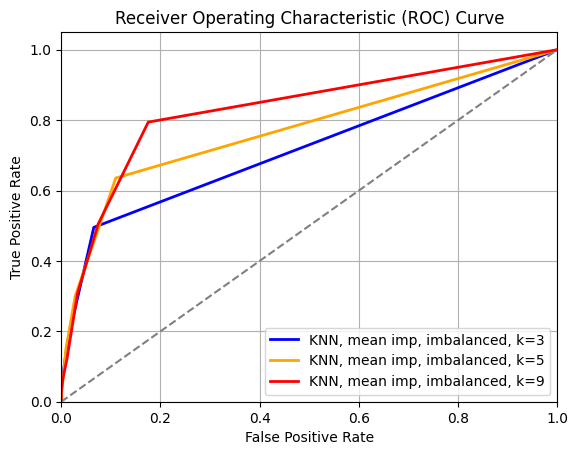

In [71]:
# 绘制一起的ROC曲线

plt.plot(fpr_1, tpr_1, color='blue', lw=2, label='KNN, mean imp, imbalanced, k=3')
plt.plot(fpr_2, tpr_2, color='orange', lw=2, label='KNN, mean imp, imbalanced, k=5')
plt.plot(fpr_3, tpr_3, color='red', lw=2, label='KNN, mean imp, imbalanced, k=9')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')#绘制起点(0,0)终点坐标是(1,1)虚线对角线帮助理解
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# 在 ROC 图中标注 AUC 值
#plt.annotate(f'AUC = {roc_auc:.2f}', xy=(0.6, 0.4), xytext=(0.5, 0.7), arrowprops=dict(facecolor='black', shrink=0.05),)

plt.grid(True)
plt.show()


In [72]:
# 计算ROC曲线
fpr_1, tpr_1, thresholds = roc_curve(y_test, y_vp16)
fpr_2, tpr_2, thresholds = roc_curve(y_test, y_vp17)
fpr_3, tpr_3, thresholds = roc_curve(y_test, y_vp18)

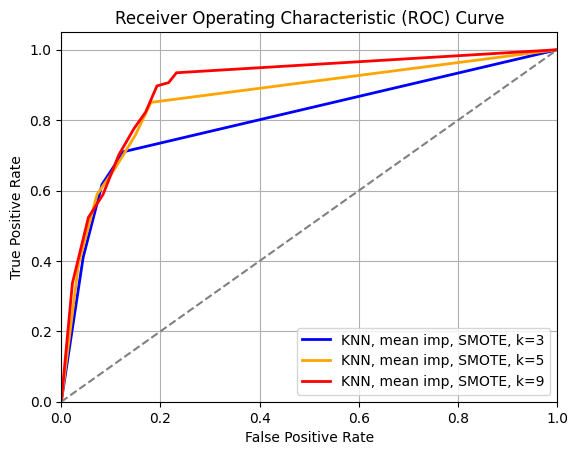

In [74]:
# 绘制一起的ROC曲线

plt.plot(fpr_1, tpr_1, color='blue', lw=2, label='KNN, mean imp, SMOTE, k=3')
plt.plot(fpr_2, tpr_2, color='orange', lw=2, label='KNN, mean imp, SMOTE, k=5')
plt.plot(fpr_3, tpr_3, color='red', lw=2, label='KNN, mean imp, SMOTE, k=9')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')#绘制起点(0,0)终点坐标是(1,1)虚线对角线帮助理解
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# 在 ROC 图中标注 AUC 值
#plt.annotate(f'AUC = {roc_auc:.2f}', xy=(0.6, 0.4), xytext=(0.5, 0.7), arrowprops=dict(facecolor='black', shrink=0.05),)

plt.grid(True)
plt.show()


##4.3.Visualize Decision Tree

In [75]:
import matplotlib.pyplot as plt


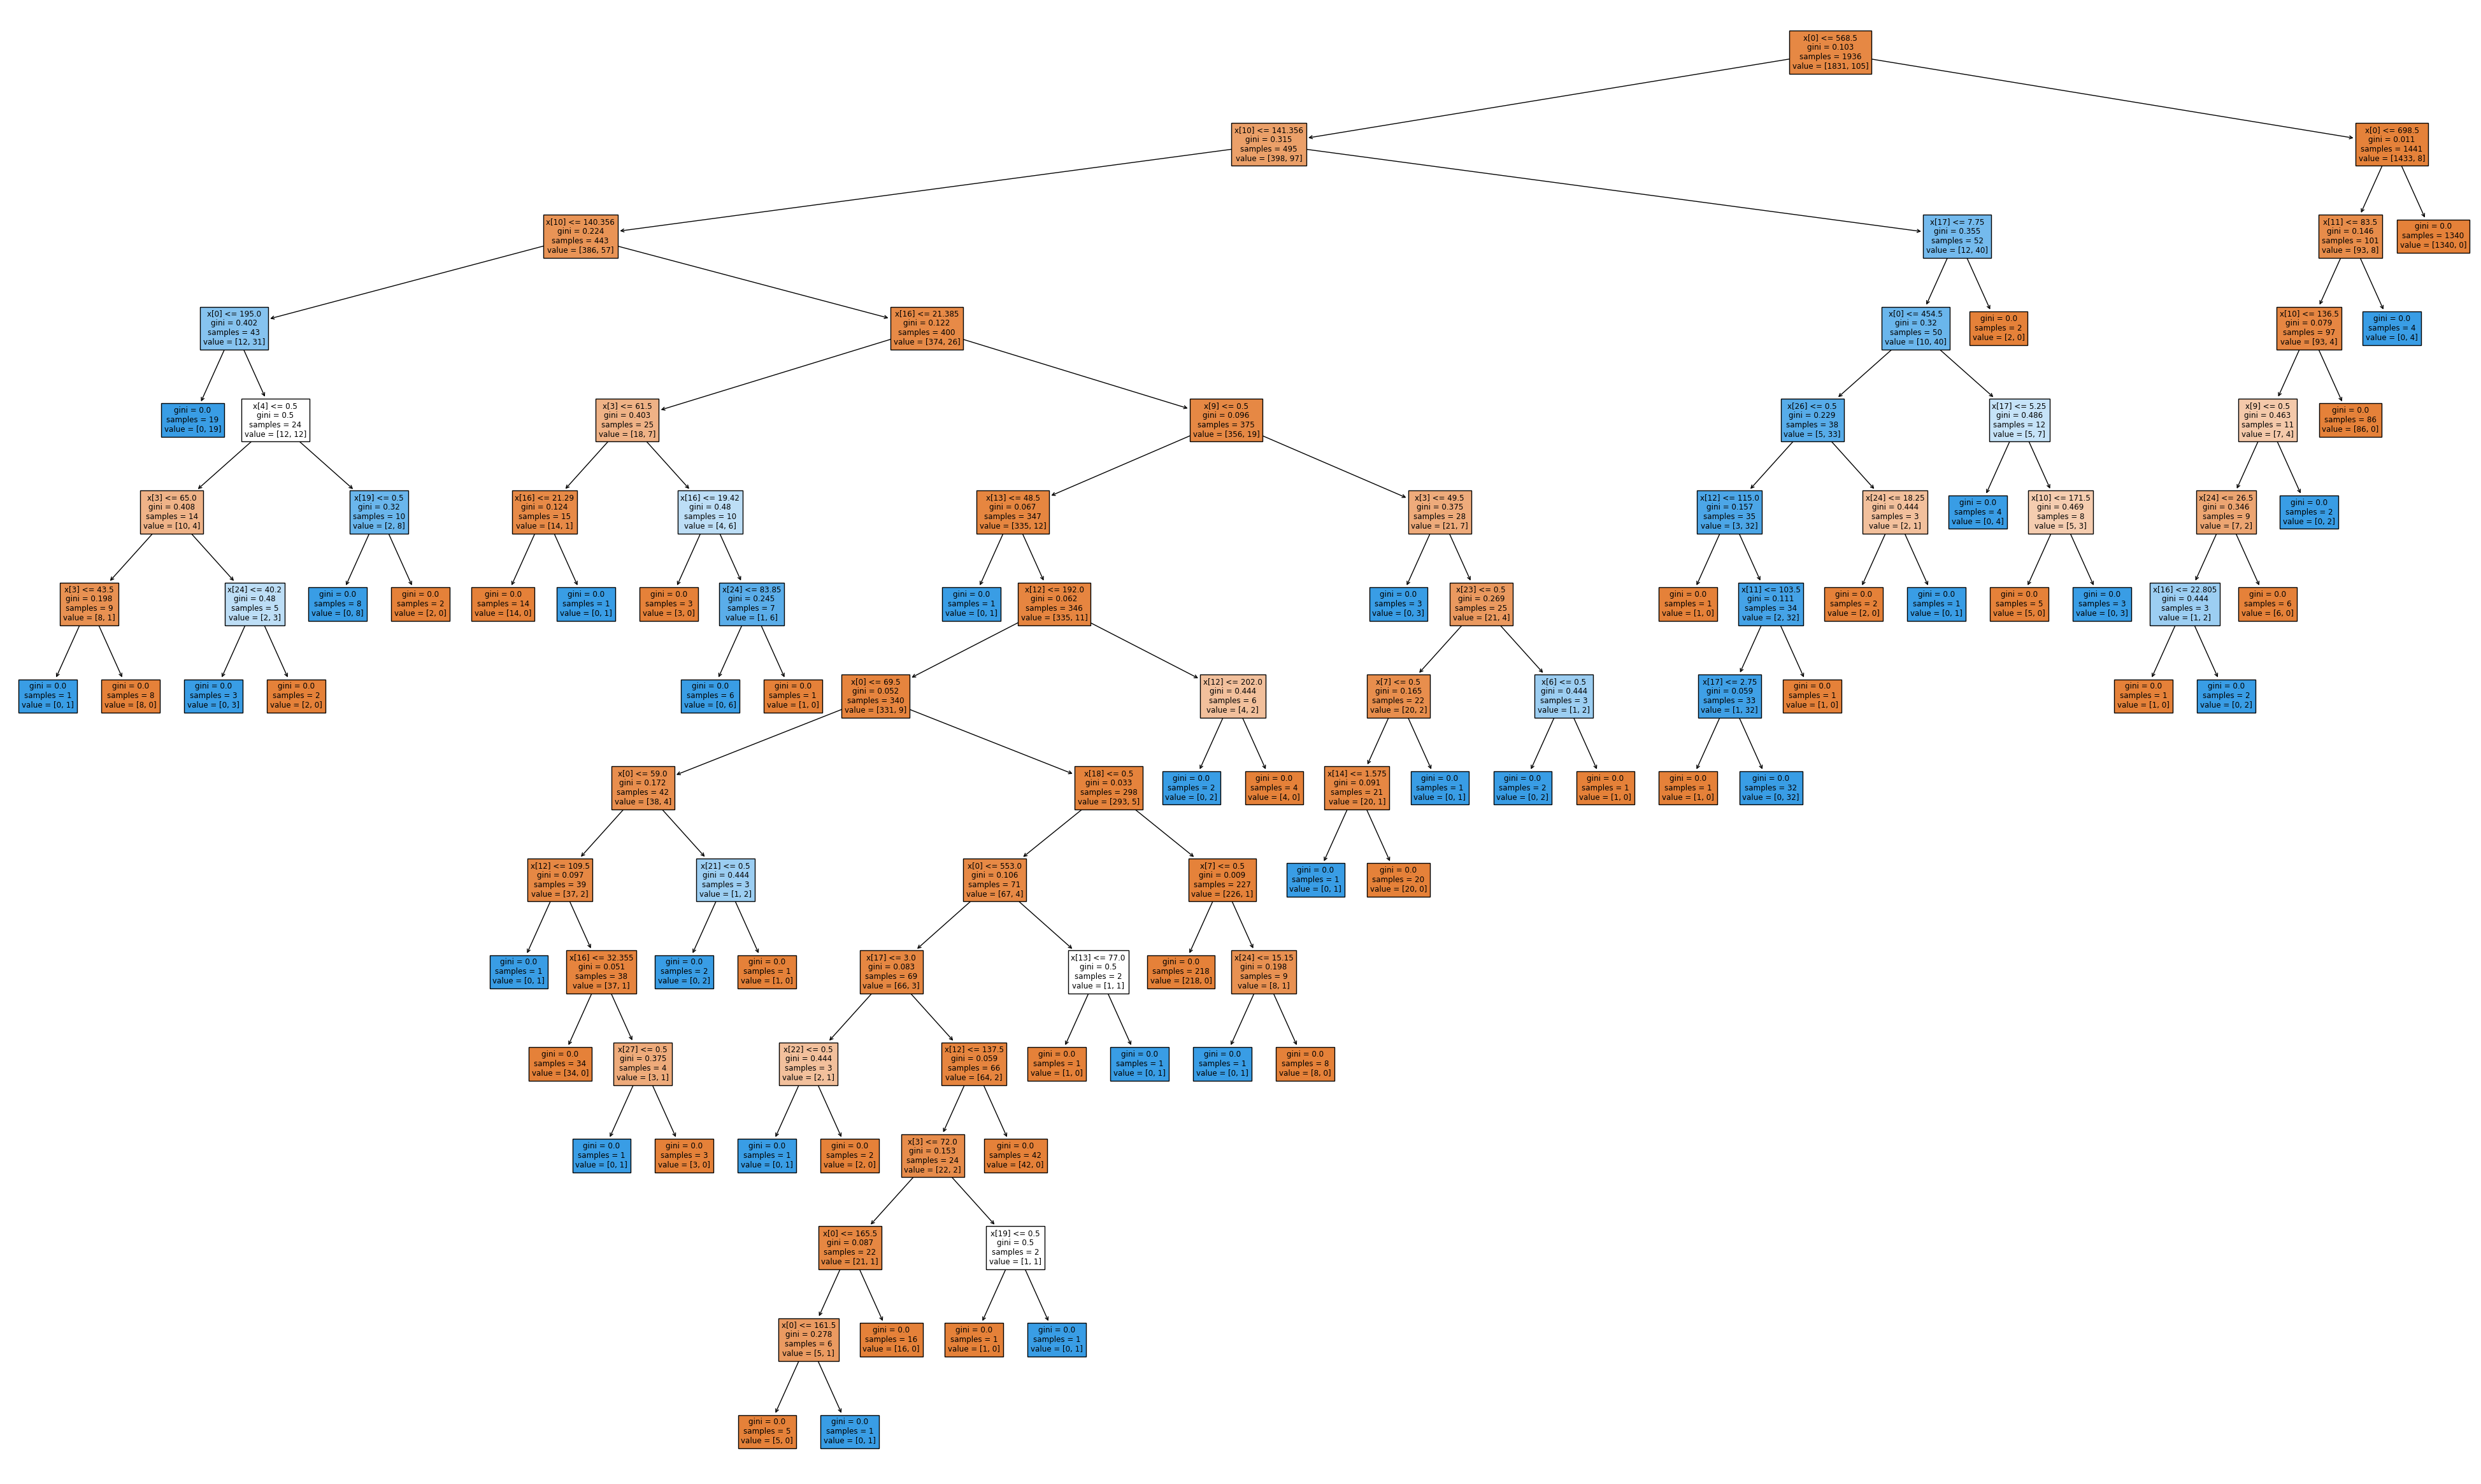

In [76]:
plt.figure(figsize=(50,30))
tree.plot_tree(clf10, filled=True)
plt.show()

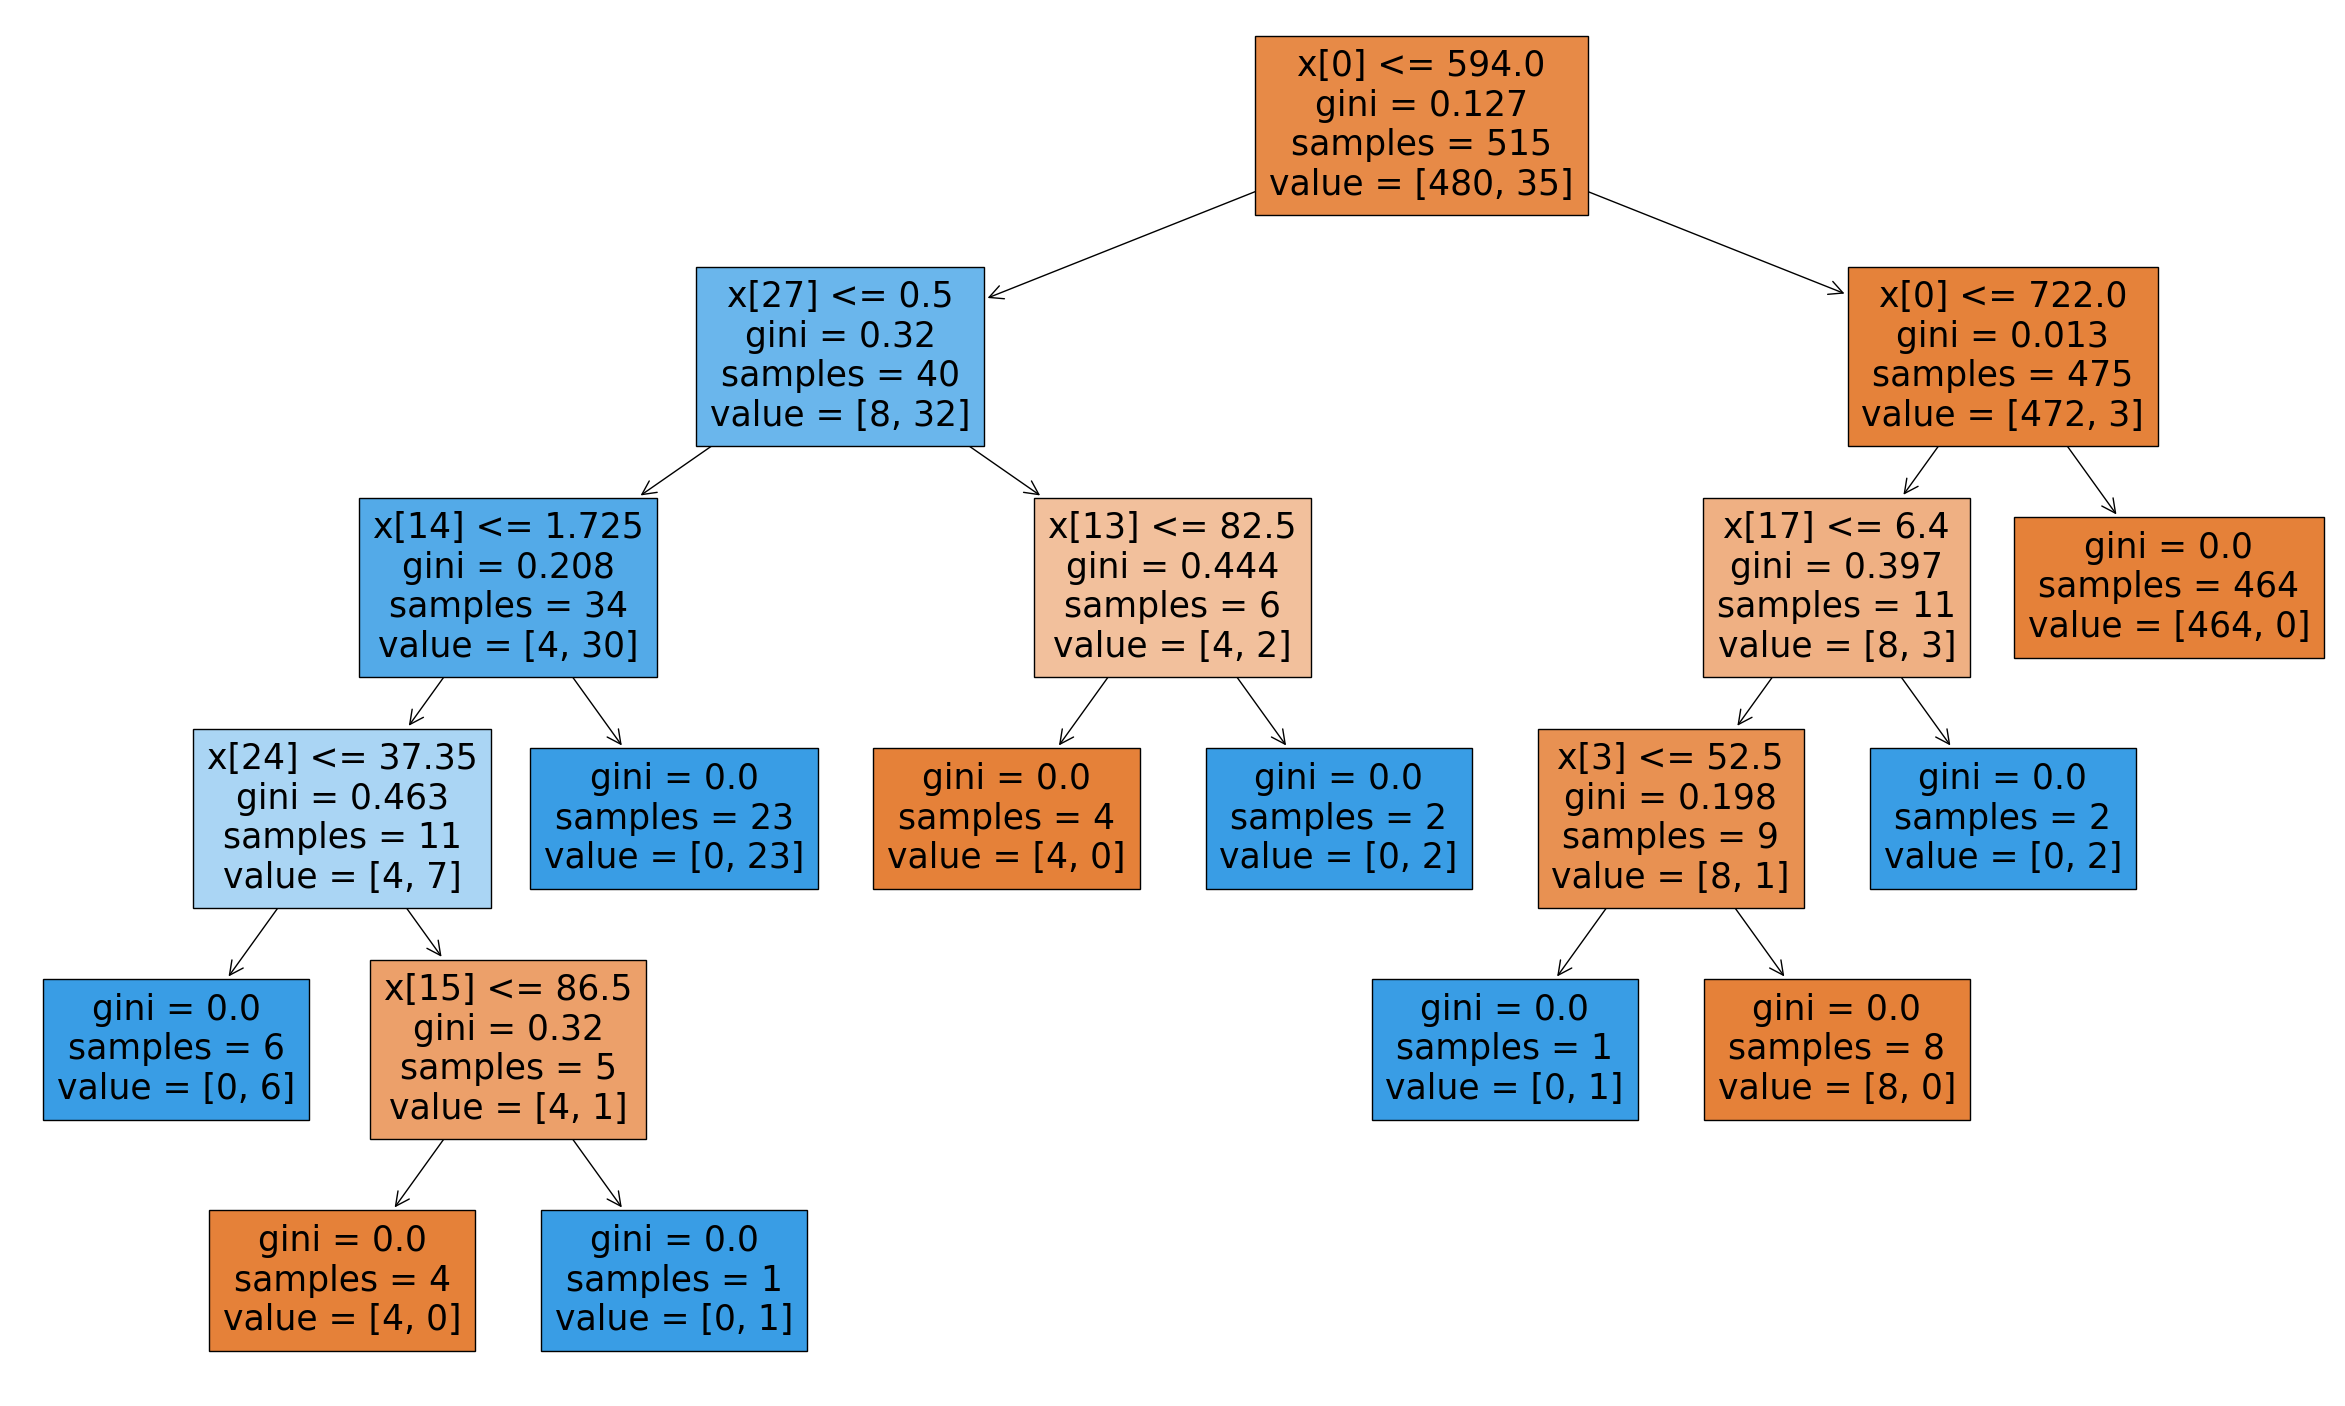

In [113]:
plt.figure(figsize=(30,18))
tree.plot_tree(clf16, filled=True)
plt.show()

## 4.4.插补收敛

In [ ]:
from fancyimpute import IterativeImputer
import numpy as np

#
# 创建IterativeImputer对象
imputer = IterativeImputer(max_iter=100)

# 进行多次Multi Imputation
num_imputations = 5
imputed_datasets = []
for i in range(num_imputations):
    imputed_data = imputer.fit_transform(X_train)
    imputed_datasets.append(imputed_data)

# 计算插补结果之间的差异
mean_diffs = []
for i in range(1, num_imputations):
    mean_diff = np.mean(np.abs(imputed_datasets[i] - imputed_datasets[i-1]))
    mean_diffs.append(mean_diff)
    print(f"Imputation {i} vs Imputation {i-1}, Mean Difference: {mean_diff}")

# 最终的插补结果
print("\nFinal Imputed Datasets:")
for i, imputed_data in enumerate(imputed_datasets):
    print(f"Imputation {i+1}:\n{imputed_data}\n")

# 平均差异变化趋势
print("Mean Difference Trend:")
print(mean_diffs)


Imputation 1 vs Imputation 0, Mean Difference: 0.0
Imputation 2 vs Imputation 1, Mean Difference: 0.0
Imputation 3 vs Imputation 2, Mean Difference: 0.0
Imputation 4 vs Imputation 3, Mean Difference: 0.0

Final Imputed Datasets:
Imputation 1:
[[1.226e+03 1.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 1.000e+00]
 [1.622e+03 1.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 [2.452e+03 1.000e+00 0.000e+00 ... 0.000e+00 1.000e+00 0.000e+00]
 ...
 [8.580e+02 0.000e+00 1.000e+00 ... 1.000e+00 0.000e+00 0.000e+00]
 [2.170e+02 1.000e+00 0.000e+00 ... 0.000e+00 1.000e+00 0.000e+00]
 [4.970e+02 1.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]]

Imputation 2:
[[1.226e+03 1.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 1.000e+00]
 [1.622e+03 1.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 [2.452e+03 1.000e+00 0.000e+00 ... 0.000e+00 1.000e+00 0.000e+00]
 ...
 [8.580e+02 0.000e+00 1.000e+00 ... 1.000e+00 0.000e+00 0.000e+00]
 [2.170e+02 1.000e+00 0.000e+00 ... 0.000e+00 1.000e+00 0.000

## 4.5.Heatmap (Variable Corrlation)

In [77]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [78]:
# 计算变量之间的相关系数矩阵
cor_matrix = df_0.corr()

<ipython-input-78-ce82f4188f24>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor_matrix = df_0.corr()


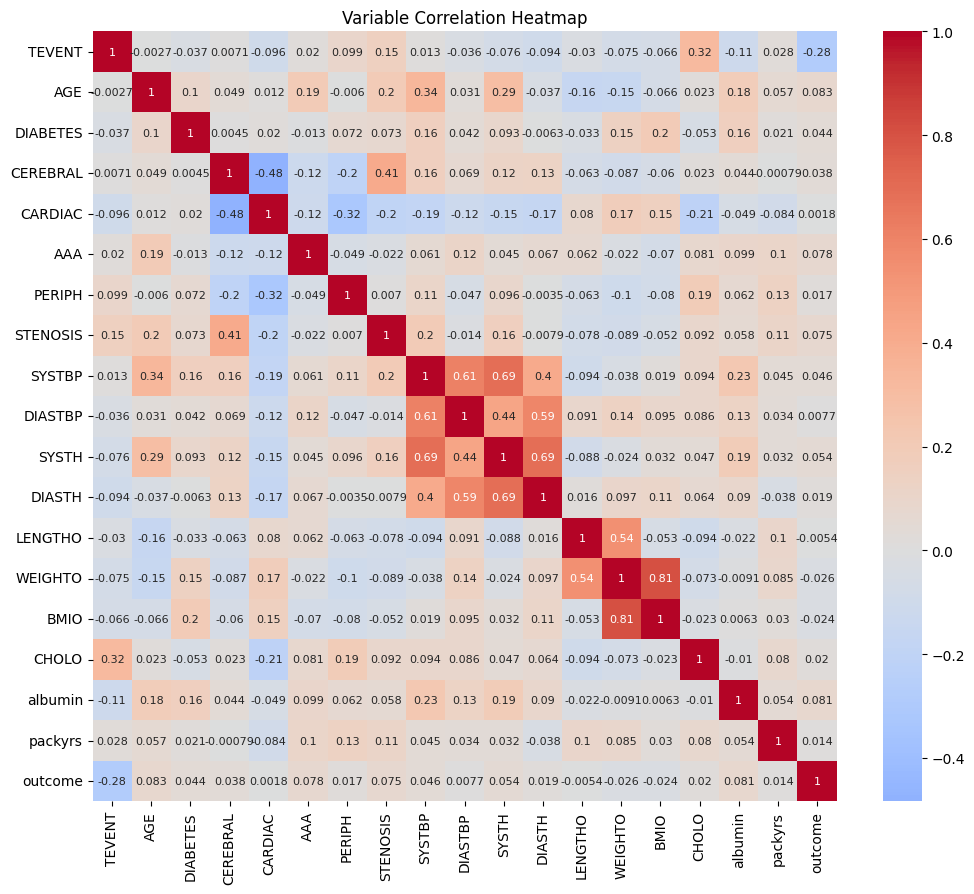

In [79]:
# 绘制相关性热力图
plt.figure(figsize=(12, 10))
sns.heatmap(cor_matrix, annot=True, cmap="coolwarm", center=0, annot_kws={"size": 8})
plt.title("Variable Correlation Heatmap")
plt.show()

## 4.6.Calibration

In [81]:
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt

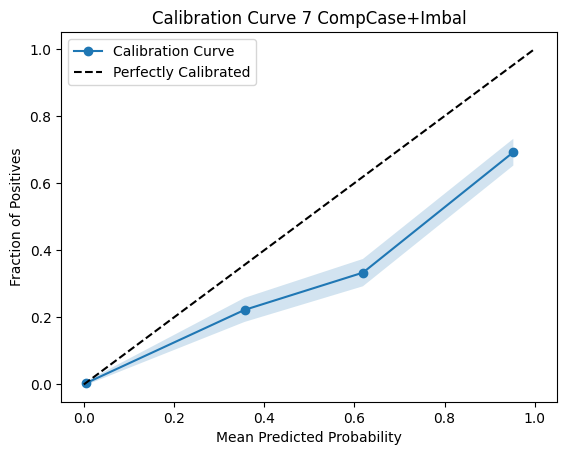

In [140]:
# 计算校准曲线
prob_true, prob_pred = calibration_curve(y_test_cc, y_vp7, n_bins=4)

# 绘制校准曲线
plt.plot(prob_pred, prob_true, marker='o', label='Calibration Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Perfectly Calibrated')
plt.fill_between(prob_pred, prob_true - 1.96 * np.sqrt(prob_true * (1 - prob_true) / len(y_test_cc)),
                 prob_true + 1.96 * np.sqrt(prob_true * (1 - prob_true) / len(y_test_cc)), alpha=0.2)

plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Curve 7 CompCase+Imbal')
plt.legend()
plt.show()

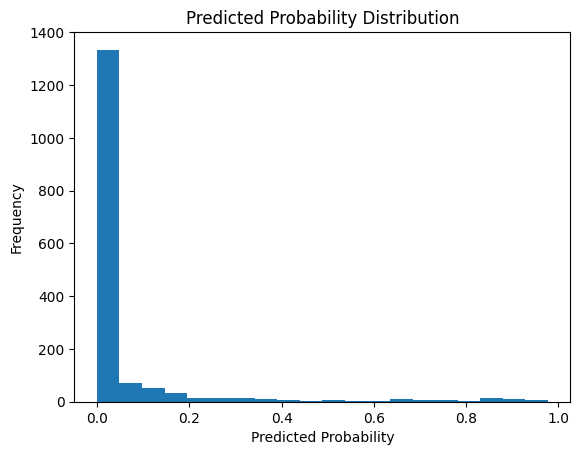

In [ ]:
import matplotlib.pyplot as plt

predicted_probabilities = clf1.predict_proba(X_train_mean)[:, 1]  # Obtain the probability value of model prediction (taking the probability of positive class)
plt.hist(predicted_probabilities, bins=20)
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Predicted Probability Distribution')
plt.show()